<a href="https://colab.research.google.com/github/SyarifulMsth/Credit-Scoring-Analysis-Project/blob/main/Credit_Scoring_Analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# **Credit Scoring Analytics**
***

| Created by : Syariful Musthofa |
|---|

***
## Business Understanding
***

**Business Context**

`Credit Scoring Analytics` merupakan sebuah proses analisis yang dilakukan oleh pemberi pinjaman atau `lenders` maupun institusi keuangan untuk menentukan kelayakan kredit (`creditworhiness`) dari peminjam atau `borrowers`.

Hasil dari dari `credit scoring analytics` ini dapat digunakan sebagai tolak ukur dalam menentukan suku bunga atau `interest rate` dari sebuah kredit. Secara umum `semakin tinggi risiko` dari sebuah kredit, maka `semakin tinggi pula suku bunganya`. Begitupun sebaliknya, `semakin rendah risiko` dari sebuah kredit, maka `semakin rendah pula suku bunganya`.

Sebagian institusi keuangan yang mengutamakan keamanan, biasanya cenderung untuk menerima pengajuan kredit atau pinjaman dengan risiko yang rendah. Di lain sisi, sebagian institusi keuangan yang ingin memaksimalkan keuntungan perlu mencari tingkat risiko kredit yang optimal. Hal inilah yang menjadikan praktik `credit scoring analytics` menjadi krusial untuk suatu institusi keuangan.

<br>

**Problem Statement**

Indonesia merupakan negara dengan jumlah penduduk yang banyak, yang sebagian masyarakatnya melakukan pengajuan kredit. Hal ini menjadi tantangan tersendiri bagi institusi keuangan untuk melakukan penilaian kelayakan kredit secara akurat dan efisien. Banyaknya jumlah orang yang mengajukan kredit dan variasi profil peminjam membuat proses analisis risiko kredit menjadi semakin kompleks. Selain itu seiring dengan meningkatnya akses terhadap teknologi dan data, insitusi keuangan perlu mengoptimalkan proses credit scoring analysis agar `lebih efisien, mengurangi risiko kredit macet, dan meningkatkan profitabilitas`.

<br>

**Goals**

Tujaun dari project ini yaitu mengoptimalkan proses pemeriksaan risiko kredit ketika pengajuan pinjaman berlangsung dengan menerapkan model `machine learning`.

Pada project ini akan menggunakan dua model machine learning, yaitu ``decision tree` dan `random forest`. Berdasarkan dua model machine learning yang dibangun tersebut, akan dipilih model dengan performa dan akurasi terbaik.


***
## Data Understanding
***

**Dataset Source & Content**

Pada project ini, dataset yang digunakan yaitu [Dataset Credit score classification](https://www.kaggle.com/datasets/parisrohan/credit-score-classification) yang terdiri dari berbagai informasi kredit terkait setiap individu selama tahun yang dimuat dalam `27 features`.

<br>

**Dataset Credit Score Classification Description**

| **Column Name** | **Description** |
|-----|-----|
| **ID** | Kolom ini merupakan indeks dari dataset yang akan kita gunakan. |
| **Customer_ID**| Kolom ini berisi customer ID yang bersifat unik. |
| **Month**| Kolom ini merepresentasikan bulan dalam satu tahun.|
| **Name**| Kolom ini berisi nama dari pelanggan tersebut.|
| **Age**| Kolom ini memuat informasi terkait umur dari seorang pelanggan.|
| **SSN**| Kolom ini berisi informasi terkait SSN (mirip seperti NIK) dari seorang pelanggan.|
| **Occupation**| Kolom ini berisi informasi pekerjaan dari seorang pelanggan.|
| **Annual_Income**| Kolom ini berisi informasi terkait total pendapatan dari seorang pelanggan per tahun.|
| **Monthly_Inhand_Salary** | Kolom ini berisi informasi terkait gaji pokok perbulan dari seorang pelanggan.|
| **Num_Bank_Accounts**| Kolom ini menunjukkan jumlah rekening bank yang dimiliki seorang pelanggan.|
| **Num_Credit_Card**| Kolom ini menunjukkan jumlah kartu kredit yang dimiliki seorang pelanggan.|
| **Interest_Rate**         | Kolom ini menunjukkan jumlah bunga kartu kredit yang dikenakan kepada seorang pelanggan.                |
| **Num_of_Loan**           | Kolom ini berisi informasi terkait jumlah pinjaman dari seorang pelanggan.                             |
| **Type_of_Loan**          | Kolom ini berisi informasi terkait jenis pinjaman yang dimiliki seorang pelanggan (Not Specified, Personal Loan, Student Loan, dll.). |
| **Delay_from_due_date**   | Kolom ini menunjukkan jumlah rata-rata hari keterlambatan dari tanggal jatuh tempo.                    |
| **Num_of_Delayed_Payment**| Kolom ini menunjukkan jumlah rata-rata pembayaran yang tertunda.                                        |
| **Changed_Credit_Limit**  | Kolom ini memuat informasi terkait persentase perubahan limit kartu kredit.                             |
| **Num_Credit_Inquiries**  | Kolom ini memuat informasi terkait jumlah pengajuan atau permintaan kartu kredit oleh seorang pelanggan.|
| **Credit_Mix**            | Kolom ini memuat informasi terkait klasifikasi campuran kredit (Standard, Standard, Good, dan Bad).      |
| **Outstanding_Debt**      | Kolom ini menunjukkan jumlah total sisa utang yang harus dibayar oleh seorang pelanggan.                |
| **Credit_Utilization_Ratio**| Kolom ini menunjukkan rasio penggunaan kartu kredit oleh seorang pelanggan.                          |
| **Credit_History_Age**    | Kolom ini menunjukkan usia riwayat kredit dari seorang pelanggan.                                       |
| **Payment_of_Min_Amount** | Kolom ini menunjukkan apakah seorang pelanggan hanya melakukan pembayaran dengan jumlah minimum (Yes, No, NM). |
| **Total_EMI_per_month**   | Kolom ini memuat informasi terkait jumlah EMI (Equated Monthly Installment) yang harus dibayar seorang pelanggan. |
| **Amount_invested_monthly**| Kolom ini menunjukkan jumlah investasi oleh seorang pelanggan tiap bulannya.                         |
| **Payment_Behaviour**     | Kolom ini menggambarkan pola pembayaran dari seorang pelanggan (Low_spent_Small_value_payments, High_spent_Small_value_payments, dll.). |
| **Monthly_Balance**       | Kolom ini menunjukkan jumlah saldo bulanan yang dimiliki seorang pelanggan.                             |
| **Credit_Score**          | Kolom ini menunjukkan kategori credit score yang dimiliki seorang pelanggan (Poor, Standard, dan Good). |


***
### Import Necessary Libraries
***

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


# ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set max columns
pd.set_option('display.max_columns', None)

***
### Gathering Data
***

In [2]:
# Connect Google Colaboratory with Kaggle
! mkdir ~/.kaggle
! cp '/content/drive/MyDrive/Colab Notebooks/Kaggle API/kaggle.json' ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
! ls ~/.kaggle

cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/Kaggle API/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
! kaggle datasets download parisrohan/credit-score-classification

Dataset URL: https://www.kaggle.com/datasets/parisrohan/credit-score-classification
License(s): CC0-1.0
  0% 0.00/9.51M [00:00<?, ?B/s]
100% 9.51M/9.51M [00:00<00:00, 124MB/s]


In [4]:
! unzip credit-score-classification.zip -d /content/data/

Archive:  credit-score-classification.zip
  inflating: /content/data/test.csv  
  inflating: /content/data/train.csv  


***
### Data Assesing
***

In [5]:
df = pd.read_csv('/content/data/train.csv')
test_df =  pd.read_csv('/content/data/test.csv')

print('Jumlah data train\t: ', len(df))
print('Jumlah data test\t: ', len(test_df))

<ipython-input-5-511e16561da0>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/data/train.csv')


Jumlah data train	:  100000
Jumlah data test	:  50000


In [6]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [7]:
# check missing value
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [8]:
# Handling duplicate data
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


***
### Data Cleaning
***

#### Membersihkan Data Numerik

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

**Observations:**

Pada hasil output di atas, terdapat beberapa `features` yang memiliki tipe data tidak sesuai (`data type mismatch`) dengan deskripsinya. Hal ini berarti terdapat `features` yang memiliki nilai tidak valid (`invalid value`).

Untuk memeriksa hal tersebut, kita dapat menggunakan *method* `describe(include="all")` yang disediakan oleh Pandas. Dengan menggunakan cara tersebut kita juga mendapatkan ringkasan statistik untuk semua kolom pada dataframe, termasuk kolom non-numerik.

In [ ]:
df. describe(include="all")

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,84998.000000,100000.000000,100000.00000,100000.000000,100000,88592,100000.000000,92998,100000,98035.000000,100000,100000,100000.000000,90970,100000,100000.000000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,NaN,NaN,NaN,NaN,434,6260,NaN,749,4384,NaN,4,13178,NaN,404,3,NaN,91049,7,98792,3
top,0x25fb6,CUS_0x942c,January,Langep,38,#F%$D@*&8,_______,20867.67,NaN,NaN,NaN,NaN,3,Not Specified,NaN,19,_,NaN,Standard,1360.45,NaN,15 Years and 11 Months,Yes,NaN,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,NaN,NaN,NaN,NaN,14386,1408,NaN,5327,2091,NaN,36479,24,NaN,446,52326,NaN,4305,25513,9,53174
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4194.170850,17.091280,22.47443,72.466040,NaN,NaN,21.068780,NaN,NaN,27.754251,NaN,NaN,32.285173,NaN,NaN,1403.118217,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3183.686167,117.404834,129.05741,466.422621,NaN,NaN,14.860104,NaN,NaN,193.177339,NaN,NaN,5.116875,NaN,NaN,8306.041270,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.645417,-1.000000,0.00000,1.000000,NaN,NaN,-5.000000,NaN,NaN,0.000000,NaN,NaN,20.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1625.568229,3.000000,4.00000,8.000000,NaN,NaN,10.000000,NaN,NaN,3.000000,NaN,NaN,28.052567,NaN,NaN,30.306660,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093.745000,6.000000,5.00000,13.000000,NaN,NaN,18.000000,NaN,NaN,6.000000,NaN,NaN,32.305784,NaN,NaN,69.249473,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5957.448333,7.000000,7.00000,20.000000,NaN,NaN,28.000000,NaN,NaN,9.000000,NaN,NaN,36.496663,NaN,NaN,161.224249,NaN,NaN,NaN,NaN


**Note:**

Apabila diperhatikan, terdapat beberapa nilai yang bermasalah seperti “__10000__”, “__-333333333333333333333333333__”, dan sejenisnya. Nilai seperti itu yang perlu dibersihkan untuk mengubah tipe data dari feature tersebut. Untuk melakukan hal ini, maka kita membutuhkan helper function sebagai berikut

In [ ]:
def return_null(val):
    if isinstance(val, str) and "__" in val:
        return np.NaN
    elif isinstance(val, str) and "_" in val:
        return np.NaN
    else:
        return val

**Note:**

Helper function di atas akan mengubah semua nilai yang mengandung “_” atau “__” menjadi sebuah np.NaN yang merupakan `missing value`.

In [ ]:
new_df = df.copy()
invalid_numerical_columns = [
    'Age',
    'Annual_Income',
    'Monthly_Inhand_Salary',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in invalid_numerical_columns:
    new_df[col] = new_df[col].apply(return_null)
    new_df[col] = new_df[col].astype('float')

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       95061 non-null   float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             93020 non-null   float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               95215 non-null   float64
 13  Type_of_Loan              88592 non-null   ob

**Note:**

Apabila dilihat pada output di atas sebagian besar features telah memiliki tipe data yang sesuai, kecuali feature `Credit History Age`. Untuk memperbaikinya, maka diperlukan helper function sebagai berikut

In [ ]:
import re

def cal_history_age(val):
    try:
        year, month = 0, 0
        if re.search('year', val, re.IGNORECASE):
            year = int(re.findall('\d+', val)[0])
        if re.search('month', val, re.IGNORECASE):
            month = int(re.findall('\d+', val)[1])
        return year*12+month
    except:
        return np.NaN

**Note:**

Helper function di atas akan mengambil komponen tahun dan bulan yang terdapat dalam data `Credit History Age`. Proses ini dilakukan dengan menggunakan teknik `Regular expression` (regex) untuk mencari pola karakter yang tepat. Helper function ini akan mengembalikan total bulan dari riwayat kredit pelanggan dan nilai np.NaN jika gagal. Berikut merupakan penggunaan dari helper function tersebut

In [ ]:
new_df['Credit_History_Age'] = new_df['Credit_History_Age'].apply(cal_history_age)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       95061 non-null   float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             93020 non-null   float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               95215 non-null   float64
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
new_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,_,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


**Observations:**

- Semua feature dengan `tipe data numerik` telah diperbaiki. Selanjutnya yaitu akan dipilih features numerik mana yang akan digunakan. Proses ini biasanya dilakukan berdasarkan `background knowledge` dan atau hasil dari proses EDA

- Berdasarkan `background knowledge`, dapat diketahui bahwa feature `Annual_Income` dan `Monthly_Inhand_Salary` merepresentasikan hal yang sama yaitu `pendapatan yang diperoleh setiap pelanggan`. Oleh karena itu, kita hanya akan memilih salah satu dari keduanya. Berikut merupakan kode untuk menghilangkan (`dropping`) feature `Annual_Income` serta beberapa feature lain yang tidak dibutuhkan seperti `Name` dan `SSN`.

In [ ]:
new_df.drop(["ID", "Name", "SSN", "Annual_Income"], axis=1, inplace=True)

**Note:**

Setelah menghilangkan beberapa features yang tidak diperlukan, proses berikutnya yaitu melanjutkan proses pembersihan data (`data cleaning`). Pada proyek ini, akan dimulai dengan membersihkan features numerik terlebih dahulu. Tahap pertama yaitu kita akan memeriksa rangkuman parameter statistik dari kolom tersebut menggunakan kode berikut

In [ ]:
numerical_columns = [
    'Age',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Credit_Utilization_Ratio',
    'Total_EMI_per_month',
    'Amount_invested_monthly',
    'Monthly_Balance',
    'Credit_History_Age'
]

new_df[numerical_columns].describe()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age
count,95061.000000,84998.000000,100000.000000,100000.00000,100000.000000,95215.000000,100000.000000,90254.000000,97909.000000,98035.000000,98991.000000,100000.000000,100000.000000,91216.000000,98791.000000,90970.000000
mean,110.934505,4194.170850,17.091280,22.47443,72.466040,2.780339,21.068780,31.033051,10.389025,27.754251,1426.503700,32.285173,1403.118217,195.539456,402.551258,221.195405
std,689.407864,3183.686167,117.404834,129.05741,466.422621,62.500940,14.860104,226.955758,6.789496,193.177339,1155.045753,5.116875,8306.041270,199.564527,213.925499,99.741364
min,-500.000000,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760,1.000000
25%,24.000000,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.320000,3.000000,566.080000,28.052567,30.306660,72.236692,270.106630,144.000000
50%,33.000000,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.370000,32.305784,69.249473,128.954538,336.731225,219.000000
75%,42.000000,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,1948.200000,36.496663,161.224249,236.815814,470.262938,302.000000
max,8698.000000,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,1977.326102,1602.040519,404.000000


**Note:**

Berdasarkan hasil di atas terlihat beberapa nilai yang tidak biasa seperti `age -500 tahun`, `num bank accounts sebanyak 1798`, etc. Nilai tersebut perlu divalidasi terlebih dahulu. Berikut merupakan kode untuk memvalidasi nilai tersebut

In [ ]:
def check_invalid_values(df, invalid_value, column):
    df = df.copy()
    customer_id = df[(df[column] == invalid_value)].groupby(by="Customer_ID", as_index=False)["Num_Bank_Accounts"].mean()
    print(df[df.Customer_ID.isin(customer_id.Customer_ID)])

In [ ]:
check_invalid_values(new_df, -500, "Age")

      Customer_ID     Month    Age Occupation  Monthly_Inhand_Salary  \
0       CUS_0xd40   January   23.0  Scientist            1824.843333   
1       CUS_0xd40  February   23.0  Scientist                    NaN   
2       CUS_0xd40     March -500.0  Scientist                    NaN   
3       CUS_0xd40     April   23.0  Scientist                    NaN   
4       CUS_0xd40       May   23.0  Scientist            1824.843333   
...           ...       ...    ...        ...                    ...   
99963  CUS_0x372c     April -500.0     Lawyer                    NaN   
99964  CUS_0x372c       May   18.0     Lawyer            3468.315833   
99965  CUS_0x372c      June   19.0     Lawyer            3468.315833   
99966  CUS_0x372c      July   19.0     Lawyer            3468.315833   
99967  CUS_0x372c    August   19.0     Lawyer            3468.315833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                      3                4              3      

In [ ]:
check_invalid_values(new_df, 1499, "Num_Credit_Card")

      Customer_ID     Month   Age  Occupation  Monthly_Inhand_Salary  \
25008  CUS_0x1fdc   January  28.0  Accountant             973.441667   
25009  CUS_0x1fdc  February  28.0  Accountant             973.441667   
25010  CUS_0x1fdc     March  28.0     _______             973.441667   
25011  CUS_0x1fdc     April   NaN  Accountant             973.441667   
25012  CUS_0x1fdc       May  28.0  Accountant                    NaN   
25013  CUS_0x1fdc      June   NaN  Accountant             973.441667   
25014  CUS_0x1fdc      July  29.0  Accountant             973.441667   
25015  CUS_0x1fdc    August  29.0  Accountant             973.441667   
72120  CUS_0xb987   January  16.0   Scientist             552.877917   
72121  CUS_0xb987  February  16.0   Scientist             552.877917   
72122  CUS_0xb987     March  16.0   Scientist             552.877917   
72123  CUS_0xb987     April  16.0   Scientist             552.877917   
72124  CUS_0xb987       May  16.0   Scientist                   

In [ ]:
check_invalid_values(new_df, 5797, "Interest_Rate")

      Customer_ID     Month   Age Occupation  Monthly_Inhand_Salary  \
71640  CUS_0x3fd9   January  49.0   Engineer              6644.4725   
71641  CUS_0x3fd9  February  49.0   Engineer              6644.4725   
71642  CUS_0x3fd9     March  50.0   Engineer              6644.4725   
71643  CUS_0x3fd9     April  50.0   Engineer                    NaN   
71644  CUS_0x3fd9       May  50.0   Engineer              6644.4725   
71645  CUS_0x3fd9      June  50.0   Engineer              6644.4725   
71646  CUS_0x3fd9      July  50.0   Engineer                    NaN   
71647  CUS_0x3fd9    August  50.0   Engineer              6644.4725   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
71640                  5                4             17          NaN   
71641                  5                4           5797          4.0   
71642                  5                4             17          4.0   
71643                  5                4             17          4.


**Observation:**

Setelah melakukan validasi terhadap beberapa nilai yang tidak biasa tersebut, dapat diketahui bahwa nilai tersebut merupakan nilai yang tidak valid. Jika melakukan validasi secara teliti, maka akan ditemukan beberapa invalid value pada beberapa feature seperti berikut.

- Pada kolom `Age`, semua `nilai yang lebih kecil dari 0` atau `lebih besar dari 90` merupakan `invalid value`.
- Pada kolom `Num_Bank_Accounts`, semua `nilai yang lebih kecil dari 0` atau `lebih besar dari 15` merupakan `invalid value`.
- Pada kolom `Num_Credit_Card`, semua `nilai yang lebih kecil dari 0` atau `lebih besar dari 15` merupakan `invalid value`.
- Pada kolom `Interest_Rate`, semua `nilai yang lebih besar dari 50` merupakan `invalid value`.
- Pada kolom `Num_of_Loan`, semua `nilai yang lebih kecil dari 0` atau `lebih besar dari 10` merupakan `invalid value`.
- Pada kolom `Delay_from_due_date`, semua `nilai yang lebih kecil dari 0` merupakan `invalid value`.
- Pada kolom `Num_of_Delayed_Payment`, semua `nilai yang lebih kecil dari 0` atau `lebih besar dari 30` merupakan `invalid value`.
- Pada kolom `Changed_Credit_Limit`, semua `nilai yang lebih kecil dari 0` merupakan `invalid value`.
- Pada kolom `Num_Credit_Inquiries`, semua `nilai yang lebih besar dari 25` merupakan `invalid value`.
- Pada kolom `Total_EMI_per_month`, semua `nilai yang lebih besar dari 1400` merupakan `invalid value`.

**Note:**

Tahapan berikutnya yaitu seluruh nilai tersebut perlu diperbaiki sebelum diolah lebih lanjut. Untuk memperbaikinya, sebagian besar `invalid value` akan diubah sebagai `missing value` sesuai dengan `background knowledge` dari permasalahan ini.

In [ ]:
new_df["Age"] = new_df.Age.apply(lambda x: np.NaN if x<0 or x>90 else x)
new_df["Num_Bank_Accounts"] = new_df.Num_Bank_Accounts.apply(lambda x: np.NaN if x<0 or x>15 else x)
new_df["Num_Credit_Card"] = new_df.Num_Credit_Card.apply(lambda x: np.NaN if x<0 or x>15 else x)
new_df["Interest_Rate"] = new_df.Interest_Rate.apply(lambda x: np.NaN if x>50 else x)
new_df["Num_of_Loan"] = new_df.Num_of_Loan.apply(lambda x: np.NaN if x<0 or x>10 else x)
new_df["Delay_from_due_date"] = new_df.Delay_from_due_date.apply(lambda x: 0.0 if x<0 else x)
new_df["Num_of_Delayed_Payment"] = new_df.Num_of_Delayed_Payment.apply(lambda x: np.NaN if x<0 or x>30 else x)
new_df["Changed_Credit_Limit"] = new_df.Changed_Credit_Limit.apply(lambda x: 0.0 if x<0 else x)
new_df["Num_Credit_Inquiries"] = new_df.Num_Credit_Inquiries.apply(lambda x: np.NaN if x>25 else x)
new_df["Total_EMI_per_month"] = new_df.Total_EMI_per_month.apply(lambda x: np.NaN if x>1400 else x)

new_df[numerical_columns].describe(include="all")

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age
count,92365.000000,84998.000000,98664.000000,97732.000000,97966.000000,90892.000000,100000.000000,88915.000000,97909.000000,96385.000000,98991.000000,100000.000000,96781.000000,91216.000000,98791.000000,90970.000000
mean,33.314145,4194.170850,5.368980,5.533612,14.531603,3.534172,21.081910,13.424529,10.427352,5.781117,1426.503700,32.285173,106.036989,195.539456,402.551258,221.195405
std,10.770143,3183.686167,2.592451,2.068336,8.739748,2.447488,14.840204,6.207212,6.720510,3.860712,1155.045753,5.116875,122.739064,199.564527,213.925499,99.741364
min,14.000000,303.645417,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760,1.000000
25%,24.000000,1625.568229,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,5.320000,3.000000,566.080000,28.052567,29.270265,72.236692,270.106630,144.000000
50%,33.000000,3093.745000,5.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.400000,5.000000,1166.370000,32.305784,66.413778,128.954538,336.731225,219.000000
75%,42.000000,5957.448333,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.870000,8.000000,1948.200000,36.496663,146.701253,236.815814,470.262938,302.000000
max,56.000000,15204.633333,11.000000,15.000000,34.000000,9.000000,67.000000,28.000000,36.970000,17.000000,4998.070000,50.000000,1396.000000,1977.326102,1602.040519,404.000000


**Note:**

Tahapan berikutnya yaitu mari kita cari tahu `missing value` yang terdapat dalam feature numerik

In [ ]:
numerical_columns = [
    'Age',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Credit_Utilization_Ratio',
    'Total_EMI_per_month',
    'Amount_invested_monthly',
    'Monthly_Balance',
    'Credit_History_Age'
]

new_df[numerical_columns].isnull().sum()

Age                          7635
Monthly_Inhand_Salary       15002
Num_Bank_Accounts            1336
Num_Credit_Card              2268
Interest_Rate                2034
Num_of_Loan                  9108
Delay_from_due_date             0
Num_of_Delayed_Payment      11085
Changed_Credit_Limit         2091
Num_Credit_Inquiries         3615
Outstanding_Debt             1009
Credit_Utilization_Ratio        0
Total_EMI_per_month          3219
Amount_invested_monthly      8784
Monthly_Balance              1209
Credit_History_Age           9030
dtype: int64

**Observation:**

- Berdasarkan hasil di atas,terdapat cukup banyak `missing value` pada data yang digunakan. Untuk membersihkan `missing value` tersebut, kita perlu membuat strategi berdasarkan pengamatan terhadap data dan `background knowledge`.

- Pada proyek ini, terdapat data setiap pelanggan selama bulan Januari sampai Agustus. Untuk mengganti `missing value` yang terdapat dalam dataset, maka bisa diganti dengan `mengambil nilai median` dari `data bulan Januari sampai Agustus`. Untuk melakukan hal tersebut, maka data perlu dikelompokkan berdasarkan `Customer_ID` dan `mengambil nilai median` untuk suatu kolom tertentu. Nilai tersebut yang akan digunakan untuk menggantikan `missing_value` pada kolom tersebut.

In [ ]:
# Disable SettingWithCopyWarning
pd.options.mode.chained_assignment = None

def fill_numerical_missing_value(column, how, df):
    df = df.copy()

    missing_customer_id = df[df[column].isna()].Customer_ID
    new = df[df.Customer_ID.isin(missing_customer_id)].groupby(by="Customer_ID", as_index=False).agg({
        column: how
    })

    for index, row in df[df[column].isna()].iterrows():
        df[column].iloc[index] = new[new.Customer_ID == str(row["Customer_ID"])][column]

    return df[column]

missing_numerical_columns = [
    'Age',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Total_EMI_per_month',
    'Amount_invested_monthly'
]

for col in missing_numerical_columns:
    new_df[col] = fill_numerical_missing_value(
        column=col,
        how="median",
        df=new_df
    )

**Note:**

Pada code di atas akan membersihkan `missing value` yang terdapat dalam semua `feature` numerik kecuali `Monthly_Balance` dan `Credit_History_Age`. Pada kedua feature tersebut, akan digunakan `nilai sebelumnya` atau `nilai sesudahnya` untuk `mengganti missing value`. Proses ini dilakukan menggunakan `method ffill()` yaitu untuk mengisi missing value dengan nilai sesudahnya dan `method bfill()` yaitu untuk mengisi missing value dengan nilai sebelumnya.

In [ ]:
new_df['Monthly_Balance'] = new_df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda v: v.ffill())
new_df['Monthly_Balance'] = new_df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda v: v.bfill())
new_df['Monthly_Balance'] = new_df['Monthly_Balance'].astype('float')

new_df['Credit_History_Age'] = new_df.groupby('Customer_ID')['Credit_History_Age'].transform(lambda v: v.ffill())
new_df['Credit_History_Age'] = new_df.groupby('Customer_ID')['Credit_History_Age'].transform(lambda v: v.bfill())
new_df['Credit_History_Age'] = new_df['Credit_History_Age'].astype('float')

In [ ]:
new_df[numerical_columns].isnull().sum()

Age                         0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
Credit_History_Age          0
dtype: int64

In [ ]:
new_df.describe()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.31111,4198.490149,5.368840,5.533910,14.53208,3.532880,21.081910,13.332490,10.426638,5.779590,1426.220376,32.285173,221.136220,106.019121,193.686347,403.067273
std,10.76504,3187.491752,2.593273,2.067712,8.74133,2.446356,14.840204,6.265679,6.715825,3.861453,1155.129026,5.116875,99.680454,122.790313,194.785222,214.796261
min,14.00000,303.645417,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,24.00000,1626.761667,3.000000,4.000000,7.00000,2.000000,10.000000,9.000000,5.340000,3.000000,566.072500,28.052567,144.000000,29.179343,73.730625,270.034729
50%,33.00000,3095.978333,5.000000,5.000000,13.00000,3.000000,18.000000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.403026,129.361839,337.088846
75%,42.00000,5961.637500,7.000000,7.000000,20.00000,5.000000,28.000000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,146.707645,234.346249,471.553318
max,56.00000,15204.633333,11.000000,15.000000,34.00000,9.000000,67.000000,28.000000,36.970000,17.000000,4998.070000,50.000000,404.000000,1396.000000,1977.326102,1602.040519


#### Membersihkan Data Categorical

**Note:**

Tahapan berikutnya yaitu membersihkan `feature categorical` yang terdapat dalam dataset. Untuk melakukannya, pertama yaitu perlu mengecek nilai dari setiap `feature categorical` tersebut.

In [ ]:
categorical_columns = [
    'Month',
    'Occupation',
    'Type_of_Loan',
    'Credit_Mix',
    'Payment_of_Min_Amount',
    'Payment_Behaviour',
    'Credit_Score'
]

for col in categorical_columns:
    print(new_df[col].value_counts())

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64
Type_of_Loan
Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt 

**Observation:**

- Apabila diperhatikan pada output di atas, terdapat beberapa `invalid value` seperti pada `feature Occupation` terdapat nilai “_______” serta pada `feature Payment_Behaviour` terdapat nilai “!@9#%8”.

- Selain itu, pada `feature Type_of_Loan terdapat` data yang memiliki lebih dari satu kategori contohnya, seperti **“Not Specified, Mortgage Loan, Auto Loan, dan Payday Loan“.**

In [ ]:
new_df['Occupation'] = new_df['Occupation'].apply(lambda x: np.NaN if x == "_______" else x)
new_df['Credit_Mix'] = new_df['Credit_Mix'].str.replace('_','Unknown')
new_df['Payment_Behaviour'] = new_df['Payment_Behaviour'].str.replace('!@9#%8','Unknown')

new_df['Type_of_Loan'] = new_df[~(new_df.Type_of_Loan.isna())]['Type_of_Loan'].apply(lambda x: str(x).split(',')[0])

**Note:**

Pada kode di atas, kita telah berhasil mengganti nilai “_______” dalam `feature Occupation` menjadi `missing value`. Kemudian menggubah `invalid value` pada feature `Credit_Mix` dan `Payment_Behaviour` menjadi nilai **“Unknown”**. Selain itu, pada feature `Type_of_Loan`, kita hanya akan `mengambil kategori pertama` untuk data yang memiliki lebih dari satu kategori.

Hingga pada tahapan ini semua `invalid value` yang terdapat dalam feature kategorikal telah dibersihkan. Selanjutnya kita akan memvalidasinya kembali sebagai berikut


In [ ]:
for col in categorical_columns:
    print(new_df[col].value_counts())

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
Occupation
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64
Type_of_Loan
Credit-Builder Loan        10416
Payday Loan                10248
Personal Loan              10200
Not Specified               9848
Student Loan                9672
Debt Consolidation Loan     9648
Mortgage Loan               9632
Auto Loan                   9568
Home Equity Loan            9360
Name: count, dtype: int64
Credit_Mix
Standard    36479
Good        24337
Unknown     20195
Bad         18989
Name: count, dtype: int64
Payment_of_M

Selanjutnya mari periksa jumlah `missing value` pada data feature categorical

In [ ]:
new_df[categorical_columns].isna().sum()

Month                        0
Occupation                7062
Type_of_Loan             11408
Credit_Mix                   0
Payment_of_Min_Amount        0
Payment_Behaviour            0
Credit_Score                 0
dtype: int64

**Observation:**

Berdasarkan hasil tersebut, terdapat `missing value` pada feature `Occupation` dan `Type_of_Loan`. Untuk membersihkan `missing value` dari kolom feature `Occupation`, akan kita ganti dengan menggunakan nilai sebelumnya atau sesudahnya. Sedangkan `missing value` pada feature `Type_of_Loan` akan diubah menjadi **“Not Specified”**.

In [ ]:
new_df['Occupation'] = new_df.groupby('Customer_ID')['Occupation'].transform(lambda v: v.ffill())
new_df['Occupation'] = new_df.groupby('Customer_ID')['Occupation'].transform(lambda v: v.bfill())

new_df["Type_of_Loan"].fillna(value="Not Specified", inplace=True)

In [ ]:
new_df[categorical_columns].isna().sum()

Month                    0
Occupation               0
Type_of_Loan             0
Credit_Mix               0
Payment_of_Min_Amount    0
Payment_Behaviour        0
Credit_Score             0
dtype: int64

**Note:**

Hingga tahapan ini semua `missing value` berhasil diatasi dan sudah tidak terdapat `missing value` pada data.

***
## Exploratory Data Analysis (EDA)
***

**Note:**

Setelah tahapan `data cleaning` selesai, tahap berikutnya yaitu melakukan `Exploratory Data Analysis` (EDA), dengan tujuan untuk mencari pola atau insights menarik, sehingga bisa memperoleh gambaran terkait data.

In [ ]:
cleaned_df = new_df.copy()
cleaned_df.describe(include="all")

,Customer_ID,Month,Age,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000.00000,100000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000,100000.000000,100000
unique,12500,8,NaN,15,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,3,NaN,NaN,7,NaN,3
top,CUS_0x942c,January,NaN,Lawyer,NaN,NaN,NaN,NaN,NaN,Not Specified,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,Yes,NaN,NaN,Low_spent_Small_value_payments,NaN,Standard
freq,8,12500,NaN,7096,NaN,NaN,NaN,NaN,NaN,21256,NaN,NaN,NaN,NaN,36479,NaN,NaN,NaN,52326,NaN,NaN,25513,NaN,53174
mean,NaN,NaN,33.31111,NaN,4198.490149,5.368840,5.533910,14.53208,3.532880,NaN,21.081910,13.332490,10.426638,5.779590,NaN,1426.220376,32.285173,221.136220,NaN,106.019121,193.686347,NaN,403.067273,NaN
std,NaN,NaN,10.76504,NaN,3187.491752,2.593273,2.067712,8.74133,2.446356,NaN,14.840204,6.265679,6.715825,3.861453,NaN,1155.129026,5.116875,99.680454,NaN,122.790313,194.785222,NaN,214.796261,NaN
min,NaN,NaN,14.00000,NaN,303.645417,0.000000,0.000000,1.00000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.230000,20.000000,1.000000,NaN,0.000000,0.000000,NaN,0.007760,NaN
25%,NaN,NaN,24.00000,NaN,1626.761667,3.000000,4.000000,7.00000,2.000000,NaN,10.000000,9.000000,5.340000,3.000000,NaN,566.072500,28.052567,144.000000,NaN,29.179343,73.730625,NaN,270.034729,NaN
50%,NaN,NaN,33.00000,NaN,3095.978333,5.000000,5.000000,13.00000,3.000000,NaN,18.000000,14.000000,9.400000,5.000000,NaN,1166.155000,32.305784,219.000000,NaN,66.403026,129.361839,NaN,337.088846,NaN
75%,NaN,NaN,42.00000,NaN,5961.637500,7.000000,7.000000,20.00000,5.000000,NaN,28.000000,18.000000,14.850000,8.000000,NaN,1945.962500,36.496663,302.000000,NaN,146.707645,234.346249,NaN,471.553318,NaN


**Note:**

Tahapan berikutnya yaitu membuat visualisasi untuk mempermudah dalam memahami pola dan insights pada data

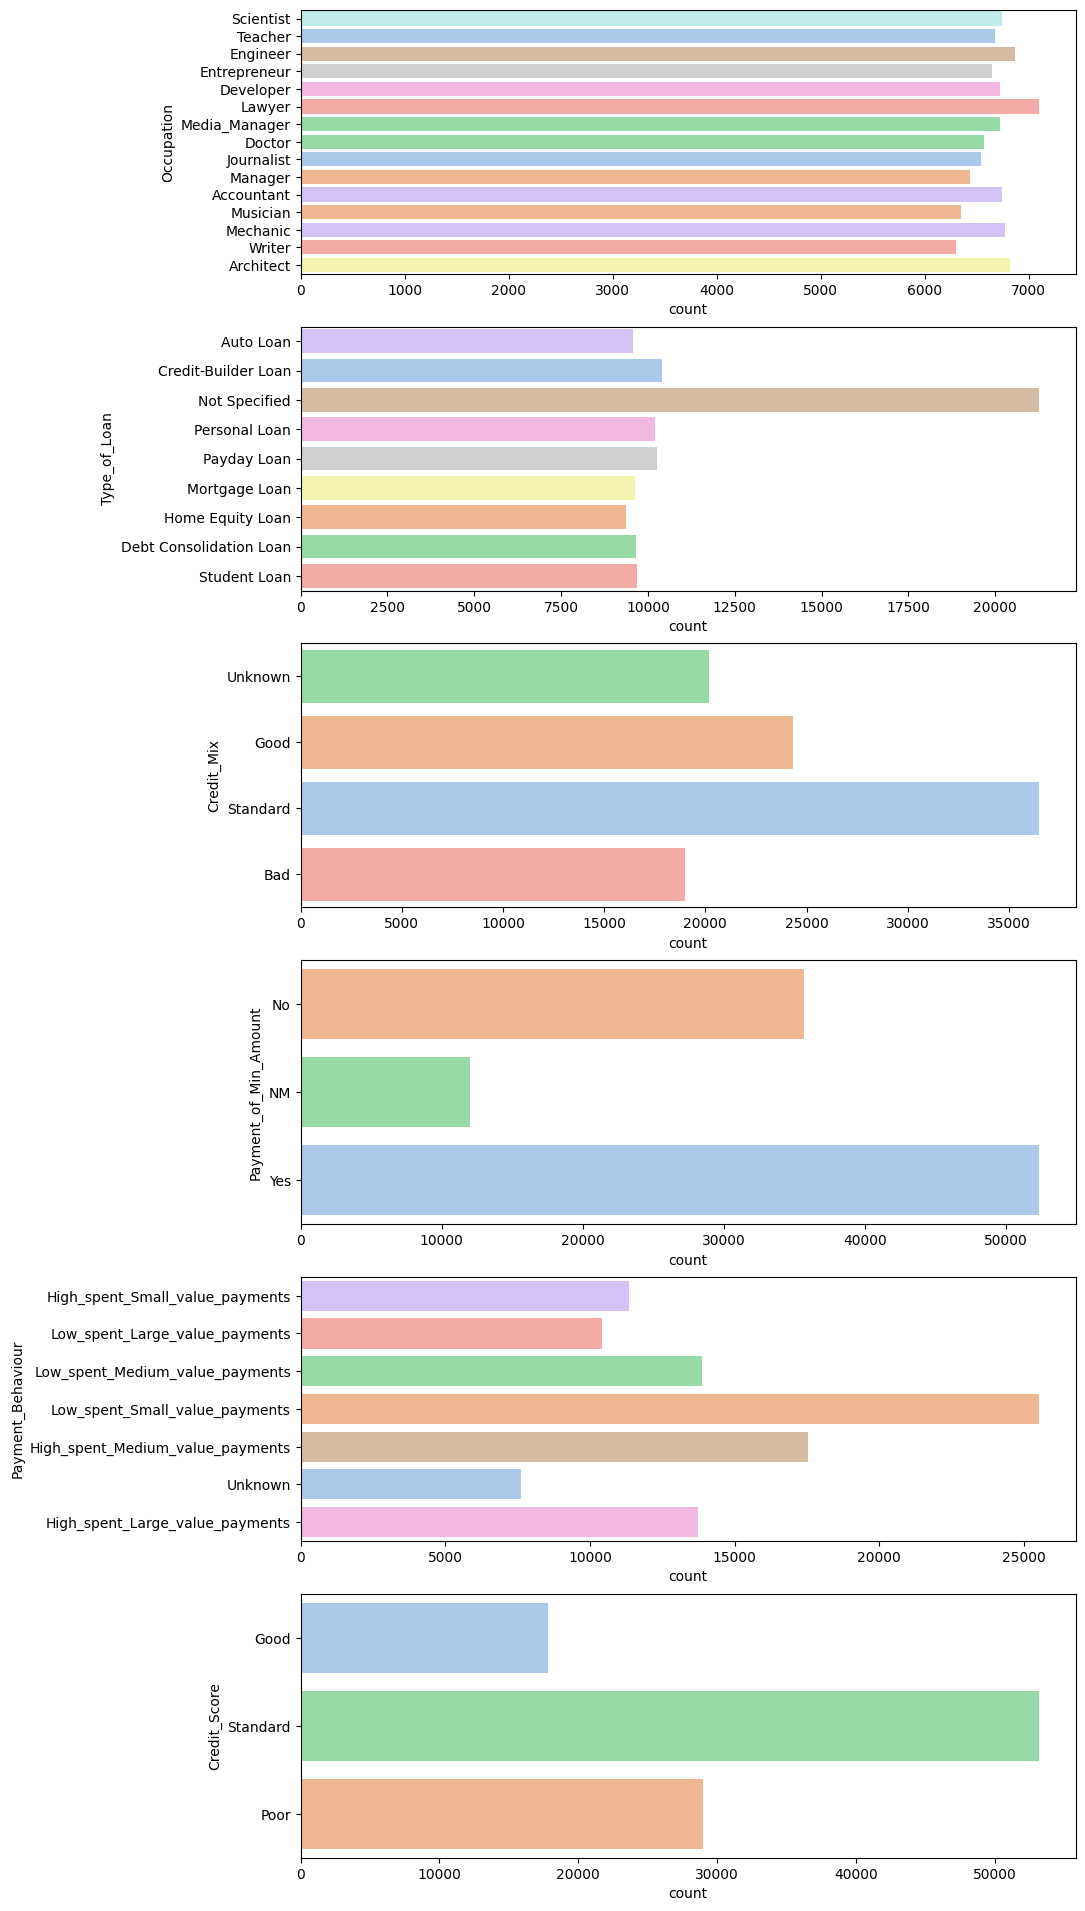

In [ ]:
categorical_columns = [
    'Occupation',
    'Type_of_Loan',
    'Credit_Mix',
    'Payment_of_Min_Amount',
    'Payment_Behaviour',
    'Credit_Score'
]

fig, ax = plt.subplots(len(categorical_columns), 1, figsize=(10, 24))

for i, feature in enumerate(categorical_columns):
    # Generate a random color palette and convert to list
    palette = sns.color_palette("pastel", n_colors=len(cleaned_df[feature].unique()))
    random_palette = np.random.permutation(palette).tolist()
    sns.countplot(data=cleaned_df, y=feature, ax=ax[i], palette=random_palette)

plt.show()

**Observation:**

Berdasarkan visualisasi data di atas, terlihat terdapat beberapa kategori yang mendominasi dalam suatu feature. Hal ini perlu menjadi catatan tersendiri,  terutama pada feature `Credit_Scoring` yang didominasi oleh kategori **“Standard”**. Fenomena ini sering disebut `imbalance data` yang berpotensi mengakibatkan terjadinya bias pada model machine learning.

Mari kita lihat visualisasi untuk feature numerik dengan menggunakan helper function berikut :

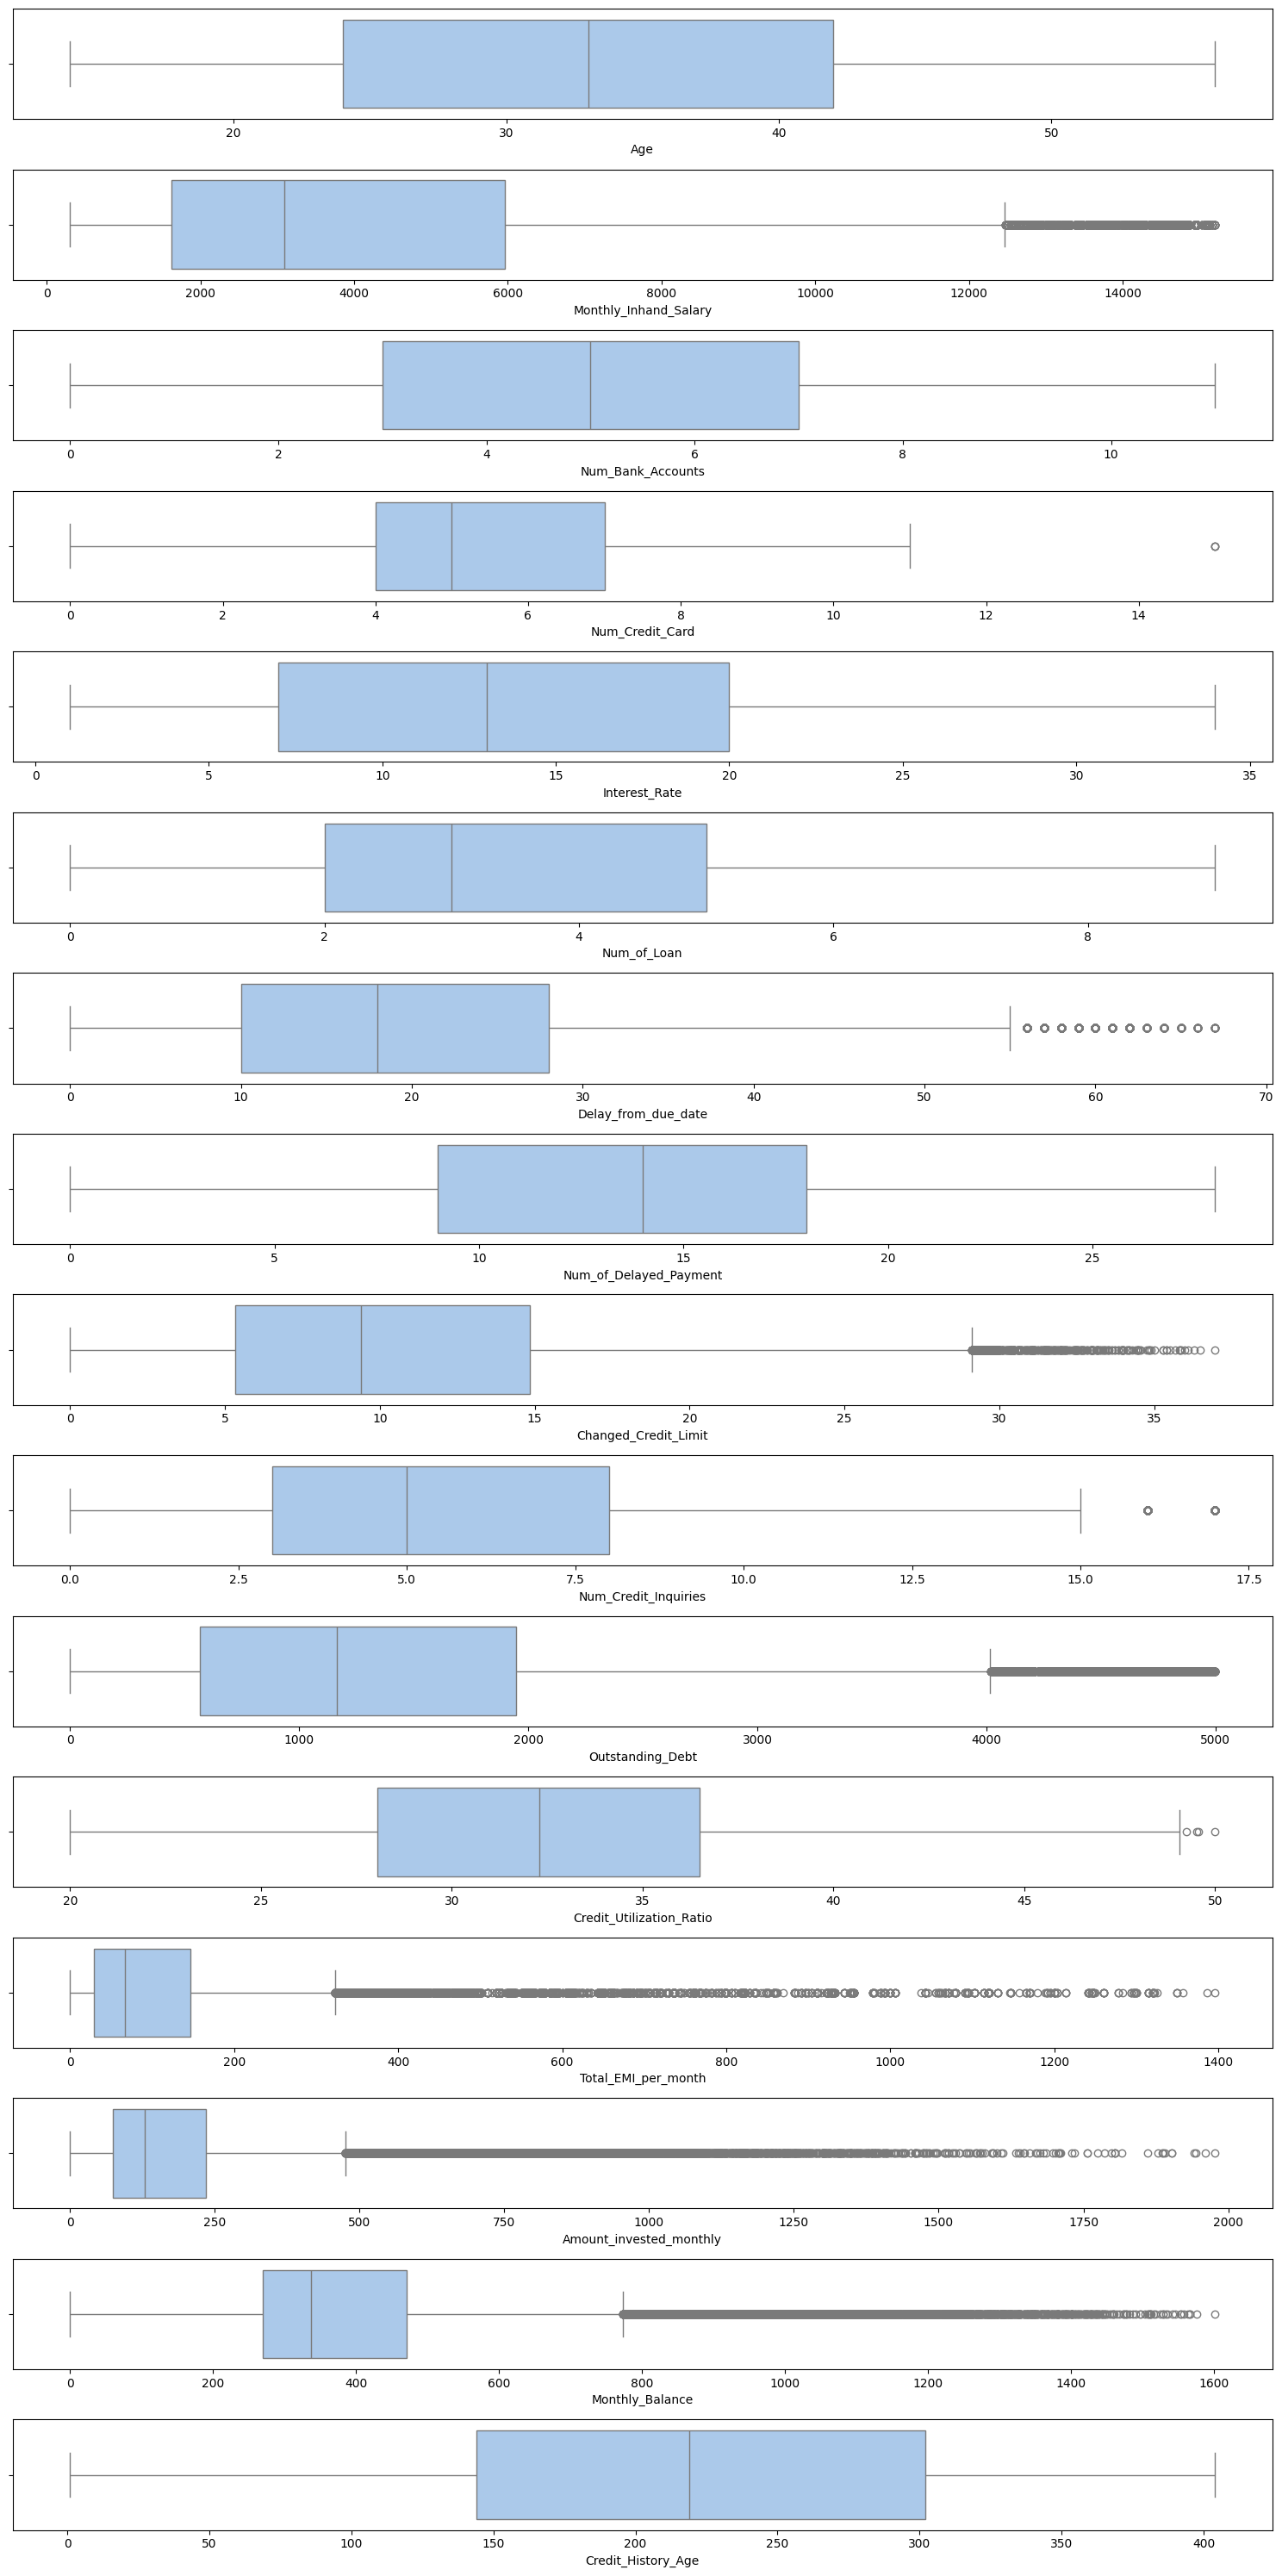

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1, figsize=(15, 30))
    for i, feature in enumerate(features):
        if segment_feature:
            unique_values = df[segment_feature].unique()
            palette = sns.color_palette("pastel", n_colors=len(unique_values))
            random_palette = np.random.permutation(palette).tolist()
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers, palette=random_palette)
            ax[i].set_ylabel(None)
        else:
            # Only generate one color for the palette
            palette = sns.color_palette("pastel", n_colors=1)
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers, palette=palette)
    plt.tight_layout()
    plt.show()

# Assuming numerical_columns and cleaned_df are already defined
numerical_dis_plot(
    features=numerical_columns,
    df=cleaned_df
)

**Observation:**

Pada visualisasi data di atas terlihat beberapa feature yang memiliki `outlier` seperti pada feature `Monthly_Inhand_Salary`. Hal ini terjadi karena terdapat beberapa pelanggan yang memiliki pendapatan per bulan yang `jauh lebih besar` dibanding pelanggan pada umumnya. `Outlier` seperti ini `dapat diabaikan terlebih dahulu`.

**Note:**

Selanjutnya mari kita melihat distribusi feature numerik tersebut jika dikelompokkan berdasarkan `Credit_Score`.

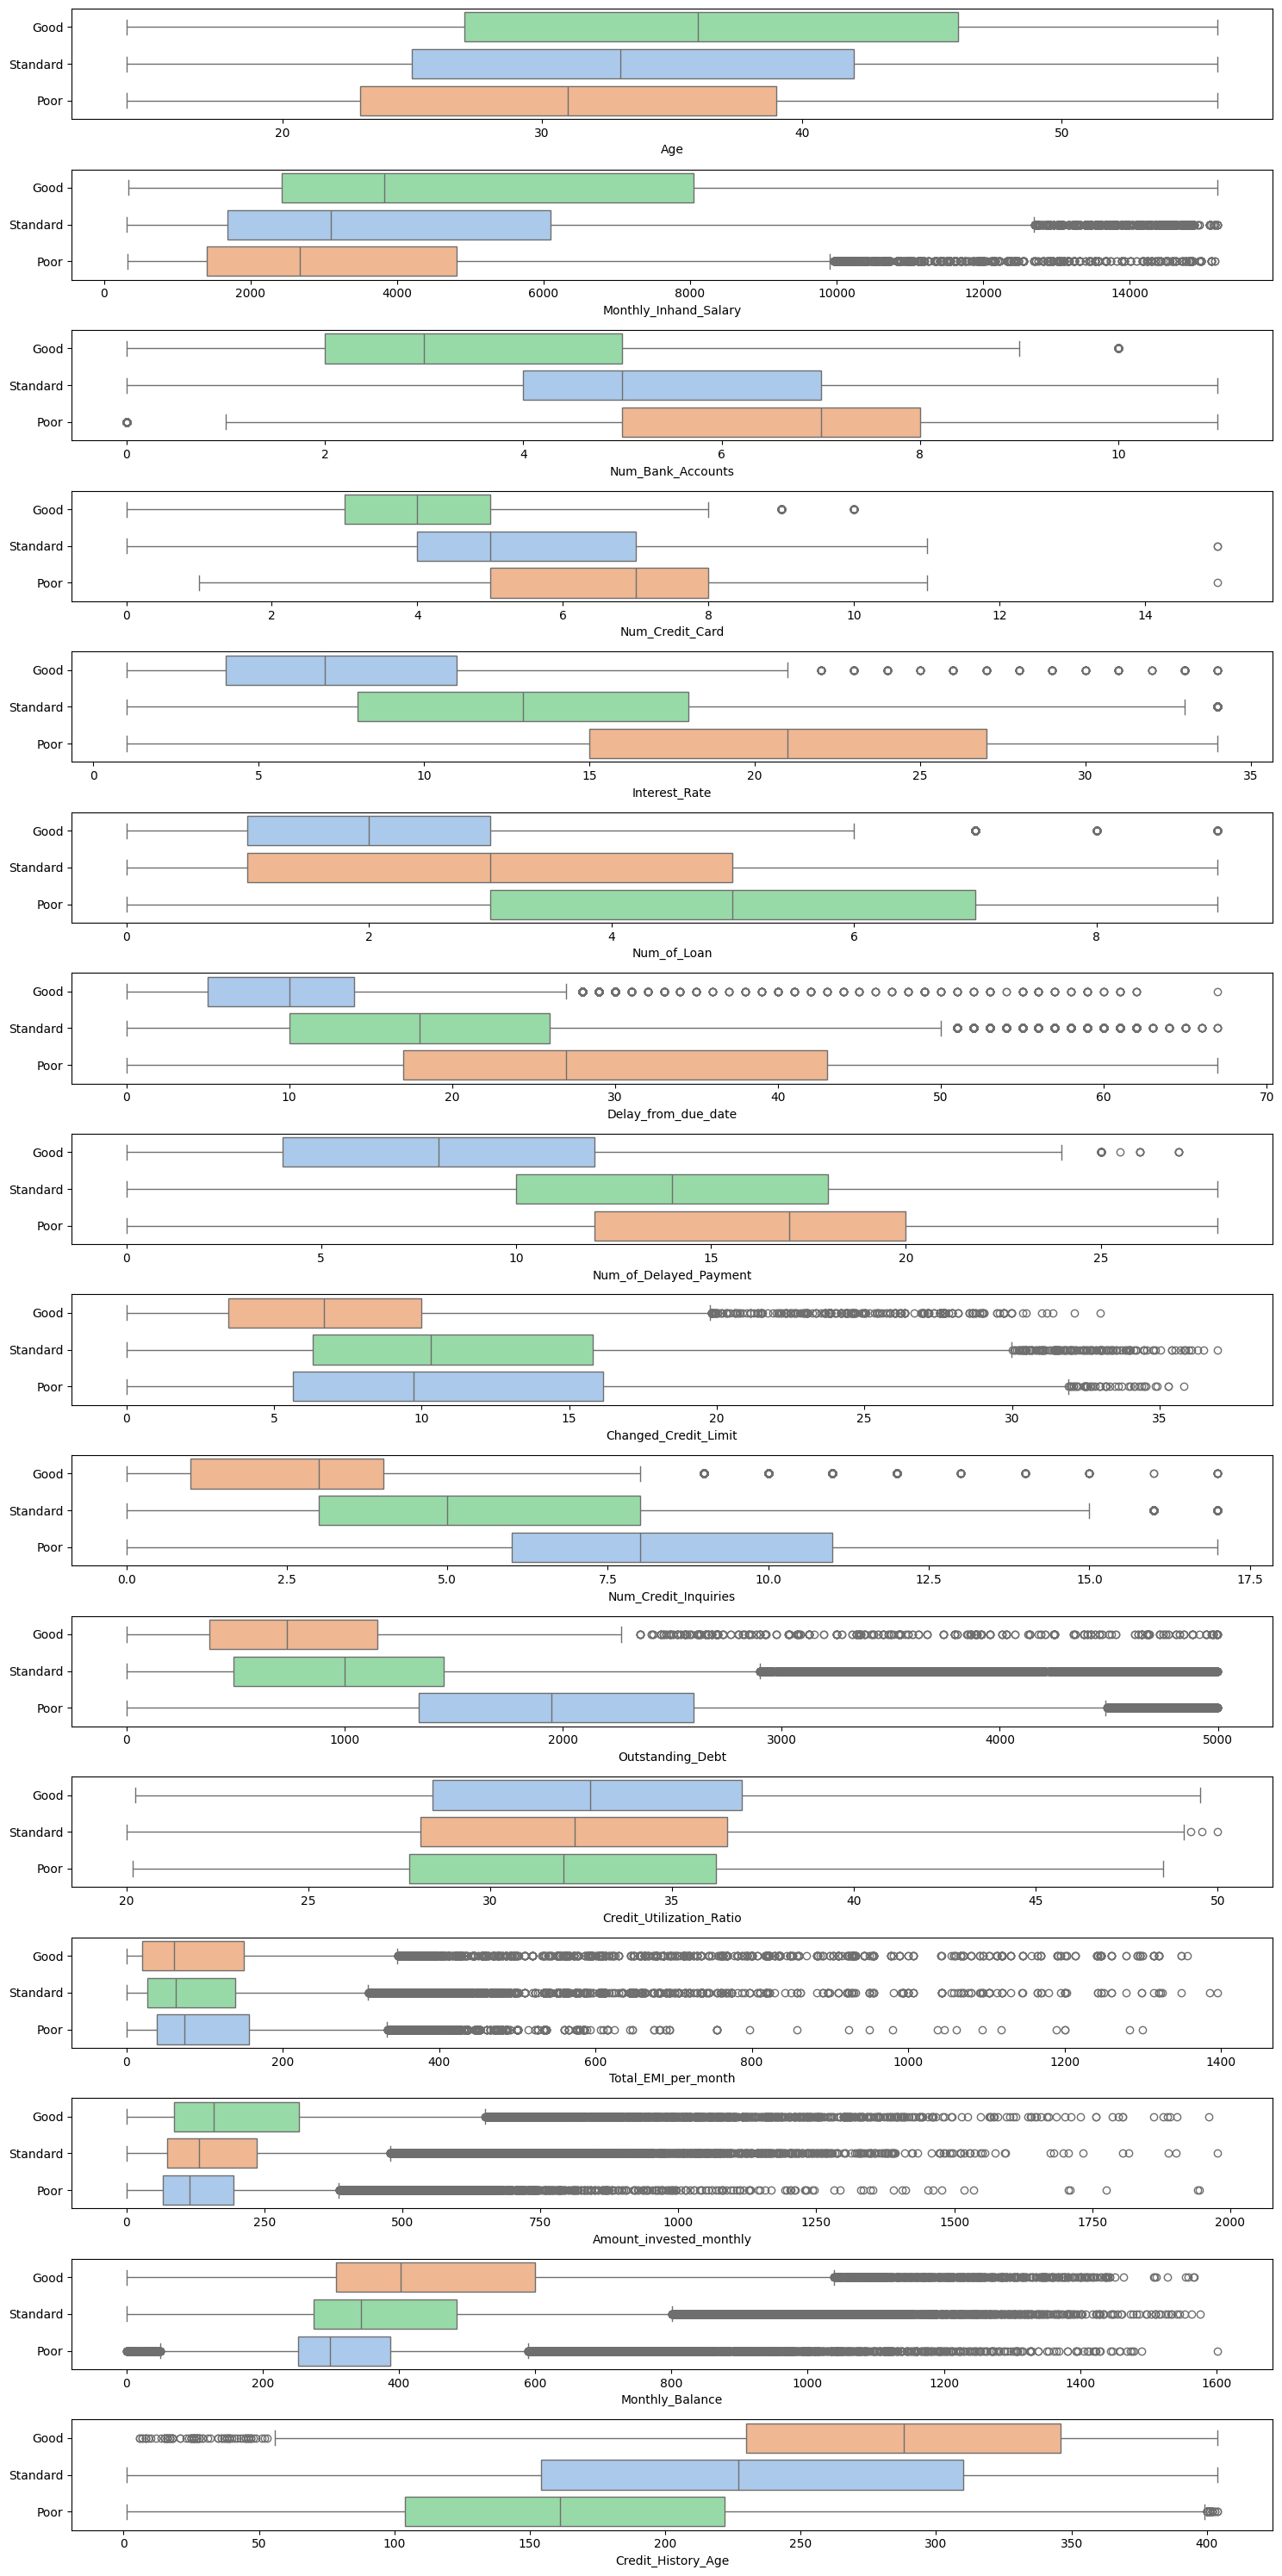

In [ ]:
numerical_dis_plot(
    features=numerical_columns,
    df=cleaned_df,
    segment_feature="Credit_Score"
)

**Observation:**

- Pada visualisasi data di atas, terlihat bahwa pelanggan yang memiliki credit score baik (`Good`) cenderung memiliki `umur yang lebih tua`. Hal ini juga sejalan dengan `usia riwayat kredit` dari seorang pelanggan. `Semakin besar usia riwayat kredit` seorang pelanggan, `semakin baik` pula credit score yang dimiliki oleh pelanggan tersebut.  

- Pelanggan dengan `credit score` yang buruk (`Poor`) cenderung memiliki banyak `akun bank, banyak kartu kredit, jumlah utang yang banyak`, serta `jumlah bunga kartu kredit yang tinggi`. Selain itu, mereka juga cenderung untuk `melakukan penunggakan pembayaran`. Hal ini terlihat pada kolom `Delay_from_due_date` dan `Num_of_Delayed_Payment`.

- Beberapa insight tersebut bisa menjadi pola yang mungkin akan sangat berguna dalam proses pengembangan model nantinya. Selain itu, perlu dicatat bahwa tidak terdapat pola yang menarik pada feature `Credit_Utilization_Ratio` sehingga perlu dipertimbangkan kembali penggunaan dari feature tersebut.

**Note:**

Tahapan berikutnya yaitu melihat distribusi `feature categorical` berdasarkan `Credit_Score`.

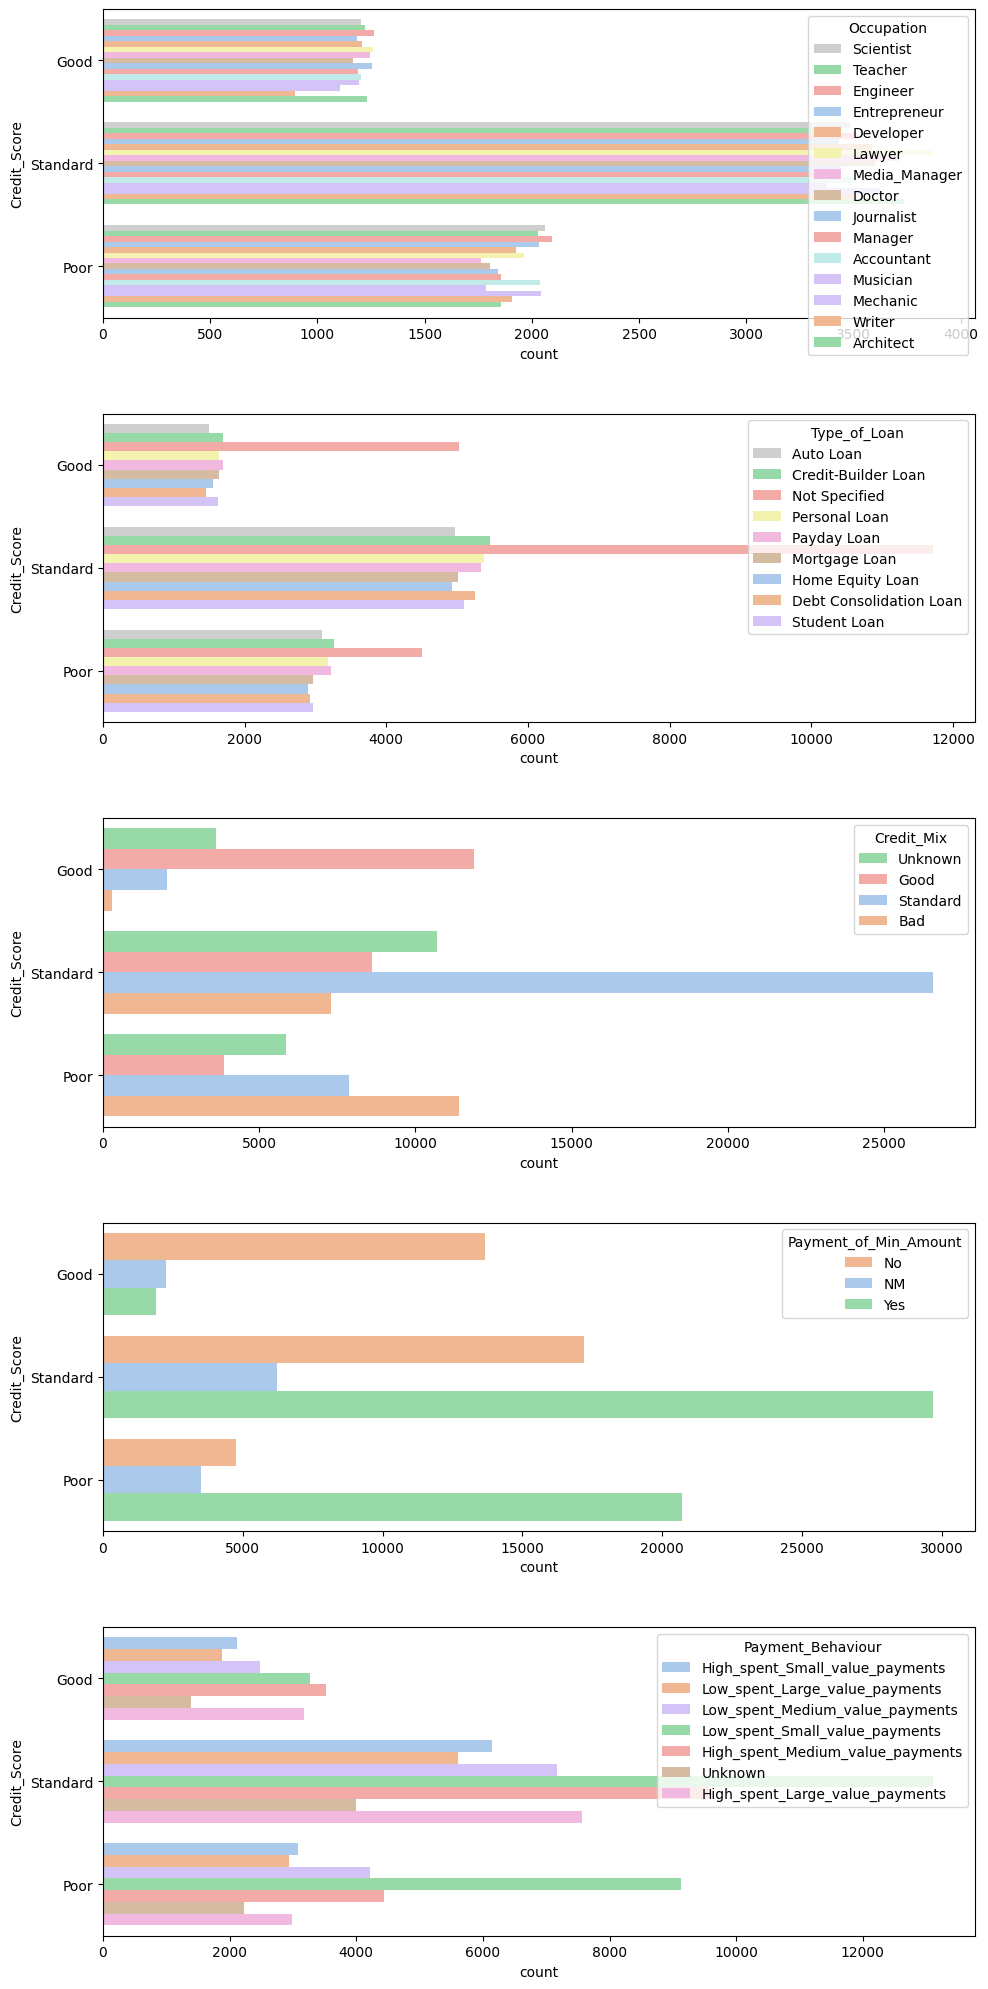

In [ ]:
def categorical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1,figsize=(10,20))
    for i, feature in enumerate(features):
        if segment_feature:
            palette = sns.color_palette("pastel", n_colors=len(cleaned_df[feature].unique()))
            random_palette = np.random.permutation(palette).tolist()
            sns.countplot(data=df, y=segment_feature, hue=feature, ax=ax[i], palette=random_palette)
        else:
            palette = sns.color_palette("pastel", n_colors=len(cleaned_df[feature].unique()))
            random_palette = np.random.permutation(palette).tolist()
            sns.countplot(data=df, x=feature, ax=ax[i], palette=random_palette)
    plt.tight_layout()
    plt.show()

categorical_plot(
    features=[
        'Occupation',
        'Type_of_Loan',
        'Credit_Mix',
        'Payment_of_Min_Amount',
        'Payment_Behaviour'
    ],
    df=cleaned_df,
    segment_feature="Credit_Score"
)

**Observation:**

- Pada visualisasi data di atas, dapat diketahui bahwa pelanggan dengan `credit score` yang baik (`Good`) memiliki kemampuan dalam mengelola kredit secara baik. Hal ini terlihat pada kolom Credit_Mix.

- Pelanggan dengan `credit score` yang buruk (`Poor`) dan `standar` cenderung hanya melakukan pembayaran dengan jumlah minimum seperti yang terlihat pada kolom `Payment_of_Min_Amount`.

- Pelanggan dengan `credit score` yang buruk (`Poor`) dan `standar`, biasanya memiliki `profil` **“Low_spent_Small_value_payments”** pada feature `Payment_Behaviour`.

- Hasil visualisasi dari feature `Occupation` dan `Type_of_Loan` tidak terdapat pola yang menarik. Oleh karena itu, perlu dipertimbangkan kembali penggunaan kedua feature tersebut untuk melatih model nantinya.


**Note:**

Hingga tahapan ini, telah ditemukan beberapa pola menarik yang terdapat dalam dataset. Selanjutnya mari kita lihat korelasi antar feature numerik.

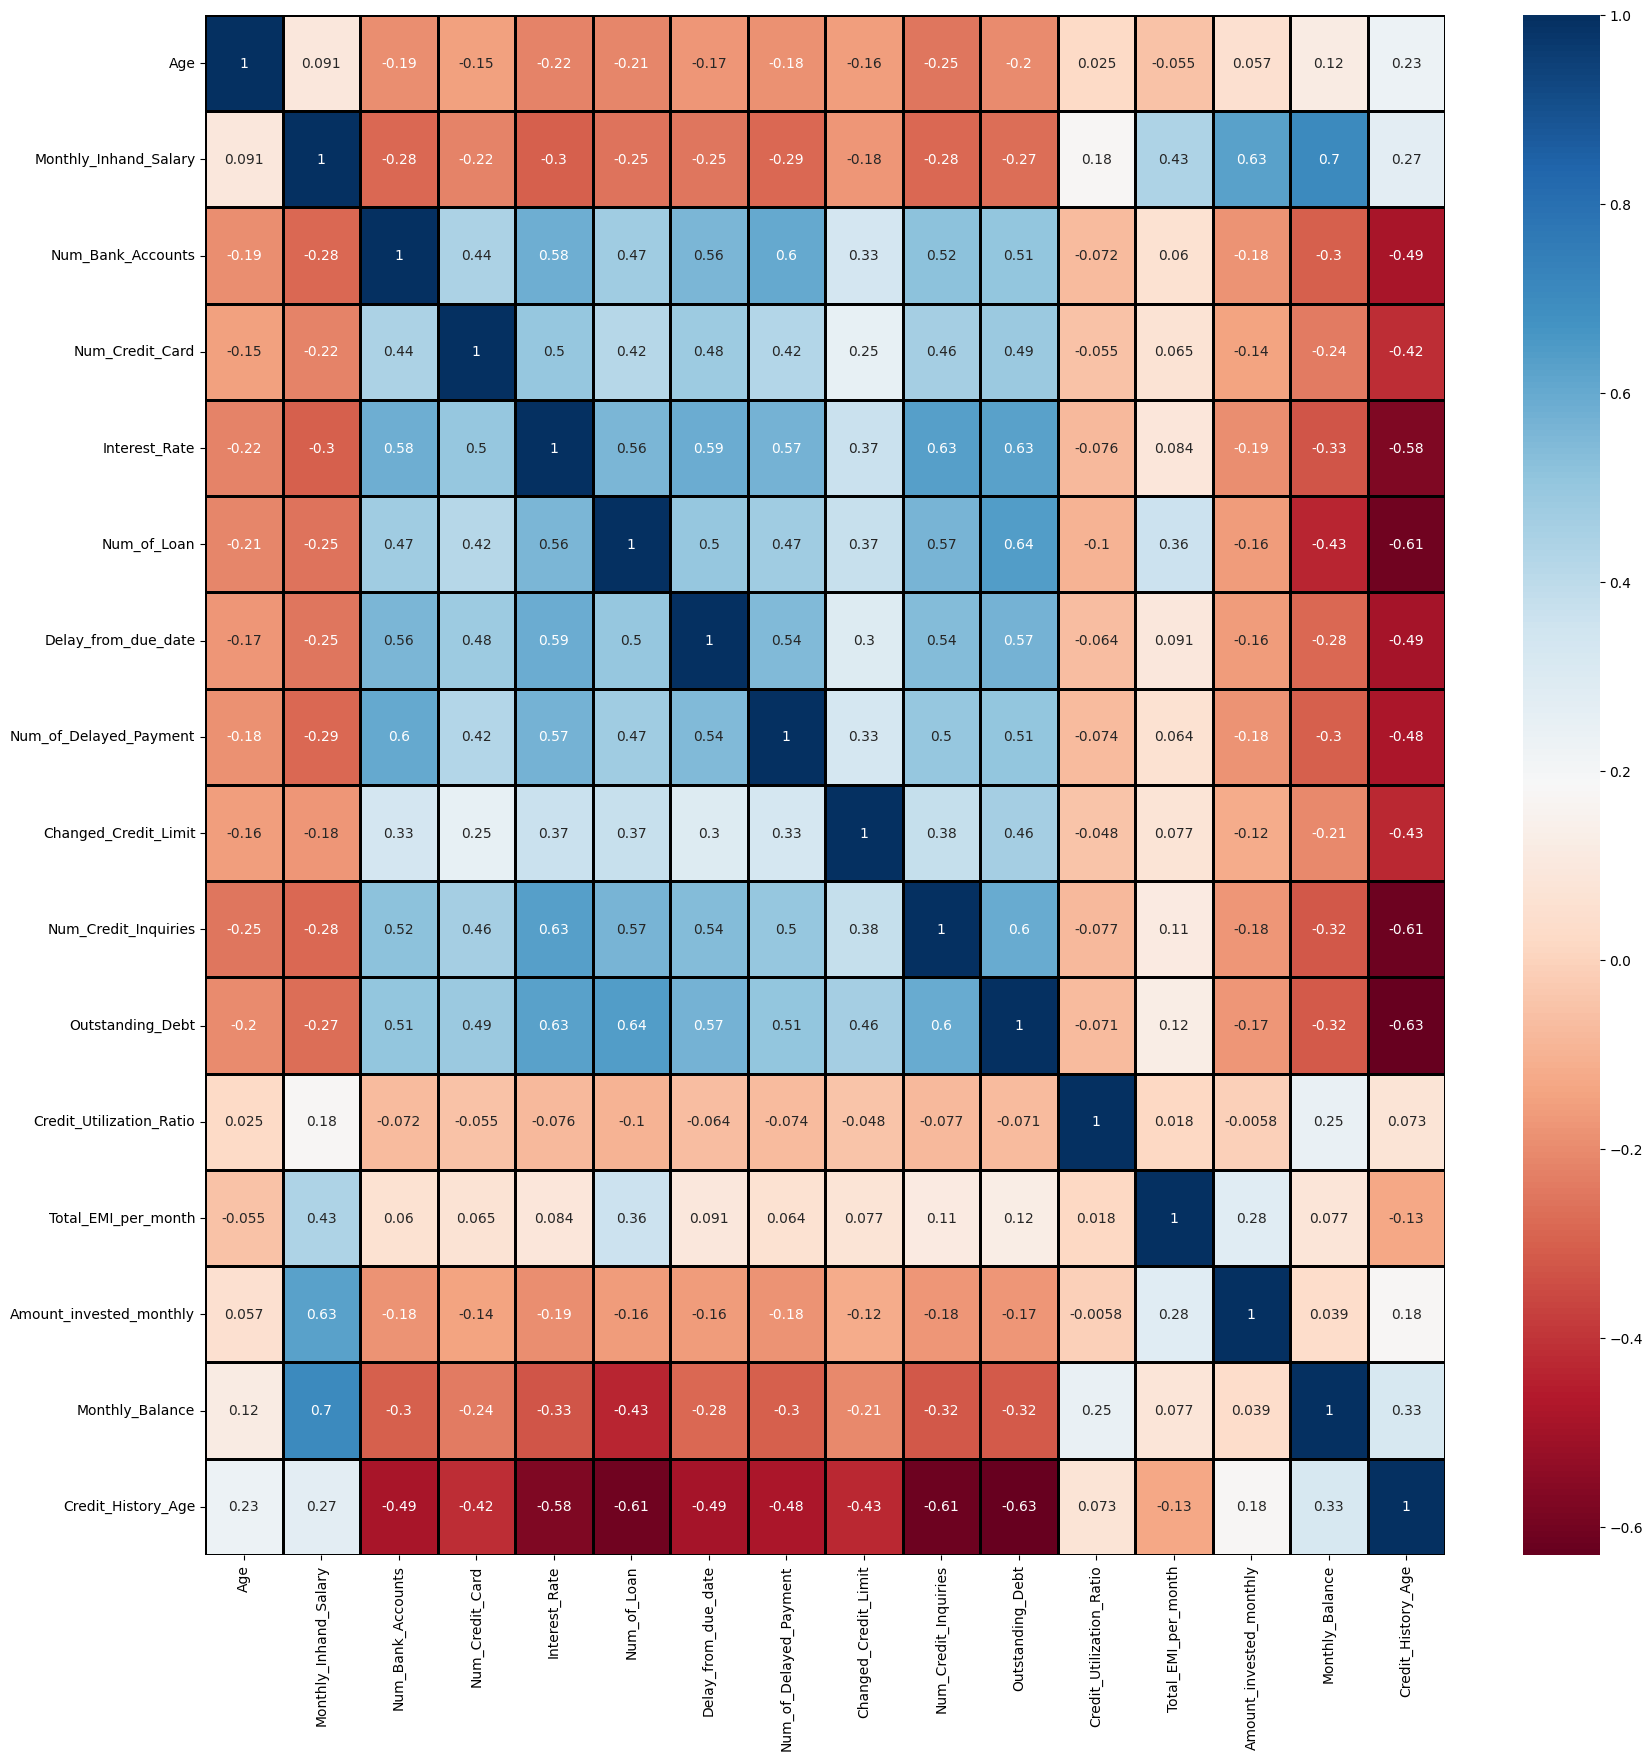

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df[numerical_columns].corr(), annot=True, cmap='RdBu', linecolor='black', linewidth=1)
plt.show()

**Observation:**

Pada visualisasi data di atas, terlihat beberapa feature yang saling berkorelasi secara positif maupun negatif. Hal ini menandakan adanya `multikolinearitas` pada dataset yang digunakan. Masalah multikolinearitas dapat diselesaikan pada tahapan `data preprocessing`.

***
## Data Preprocessing
***

Data preprocessing merupakan salah satu tahapan penting dalam proyek data science. Pada tahapan ini dilakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan. Ada beberapa tahapan yang umum dilakukan pada data preparation, antara lain,
- feature selection,
- transformasi data,
- feature engineering, dan
- dimensionality reduction.

Pada proyek ini ada beberapa tahapan yang akan dilakukan sebelum tahapan pelatihan model, yaitu sebagai berikut :
- `Membagi dataset` menjadi dua bagian yaitu data latih dan uji.
- Mengatasi `imbalanced data` dengan teknik undersampling.
- Melakukan `encoding` terhadap feature kategorik dan `scaling` terhadap feature numerik.
- `Reduksi dimensi` dan `mengatasi multikolinearitas` pada feature numerik.

### Feature selection

In [ ]:
# membuang beberapa kolom atau feature yang tidak akan digunakan dalam tahapan pelatihan model
new_cleaned_df = cleaned_df.drop(columns=['Customer_ID', 'Month', 'Occupation', 'Type_of_Loan', 'Credit_Utilization_Ratio'], axis=1)
new_cleaned_df.head()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Unknown,809.98,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,23.0,1824.843333,3.0,4.0,3.0,4.0,0.0,6.0,11.27,4.0,Good,809.98,265.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,23.0,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,Good,809.98,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,23.0,1824.843333,3.0,4.0,3.0,4.0,6.0,6.0,11.27,4.0,Good,809.98,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


### Train-Test Split

**Note:**

Pada proyek ini proporsi pembagian data latih (`data train`) dan data uji (`data test`) adalah 95:5. Artinya dataset akan dibagi menjadi 95.000 sampel untuk `data train` dan 5.000 untuk `data test`.

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(new_cleaned_df, test_size=0.05, random_state=123, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

**Note:**


Dataset dibagi menjadi `train_df` dan `test_df` dengan proporsi 95:5. Proses pembagian dataset ini dilakukan secara acak dengan menggunakan `shuffle=True` untuk memastikan semua keadaan yang terdapat dalam dataset dapat terwakilkan dengan baik.

In [ ]:
print(train_df.shape)
print(test_df.shape)

(95000, 19)
(5000, 19)


### Handling Imbalanced Data

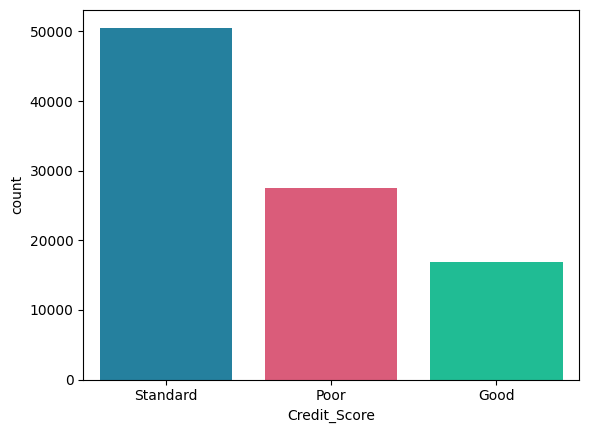

In [ ]:
custom_palette = ["#118AB2", "#EF476F", "#06D6A0"]
sns.countplot(data=train_df, x="Credit_Score", palette=custom_palette)
plt.show()

**Observation:**

- Pada visualisasi data di atas, terlihat bahwa `data train` yang digunakan pada project ini didominasi oleh kategori **“Standard”**. Hal ini menunjukkan terjadinya `imbalance data` dalam `data train` yang digunakan. `Imbalance data` atau data yang tidak seimbang berbahaya karena berpotensi menghasilkan bias sehingga membuat model cenderung memprediksi kelas atau kategori yang dominan (mayoritas).

- Untuk mengangani `imbalanced data` pada proyek ini akan digunakan teknik `undersampling`. Hal ini dilakukan karena jumlah `data yang digunakan sangat banyak` dan ingin `menghindari duplikasi data`.

In [ ]:
train_df.Credit_Score.value_counts()

Credit_Score
Standard    50547
Poor        27546
Good        16907
Name: count, dtype: int64

**Note:**

Telah diketahui kelas minoritas yaitu `Good` dengan jumlah data `16907`. Kemudian data dari kelas mayoritas yaitu `Standar` dan `Poor` akan dikurangi hingga jumlahnya sama dengan kelas `Good`.

In [ ]:
# mengelompokkan data yang mengandung kelas mayoritas dan minoritas
df_majority_1 = train_df[(train_df.Credit_Score == "Standard")]
df_majority_2 = train_df[(train_df.Credit_Score == "Poor")]
df_minority = train_df[(train_df.Credit_Score == "Good")]

**Note:**

Setelah data kelas mayoritas dan minoritas berhasil dipisahkan, selanjutnya yaitu melakukan proses `resampling` atau mengambil sampel dari data yang sudah ada. Proses ini dilakukan dengan menggunakan function `resample()` yang disediakan oleh scikit-learn.

In [ ]:
from sklearn.utils import resample

df_majority_1_undersampled = resample(df_majority_1, n_samples=16907, random_state=123)
df_majority_2_undersampled = resample(df_majority_2, n_samples=16907, random_state=123)
print(df_majority_1_undersampled.shape)
print(df_majority_2_undersampled.shape)

(16907, 19)
(16907, 19)


**Note:**

Proses selanjutnya yaitu `menggabungkan kembali` seluruh data tersebut. Selain itu, perlu juga dipastikan data yang digabungkan `diacak` dengan menggunakan function `shuffle()` yang disediakan oleh scikit-learn.

In [ ]:
from sklearn.utils import shuffle

undersampled_train_df = pd.concat([df_minority, df_majority_1_undersampled]).reset_index(drop=True)
undersampled_train_df = pd.concat([undersampled_train_df, df_majority_2_undersampled]).reset_index(drop=True)
undersampled_train_df = shuffle(undersampled_train_df, random_state=42)
undersampled_train_df.reset_index(drop=True, inplace=True)

undersampled_train_df.sample(5)

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
28013,53.0,3197.496667,0.0,6.0,6.0,0.0,29.0,6.0,5.86,0.0,Good,340.15,257.0,No,0.000000,317.885737,Low_spent_Medium_value_payments,281.863930,Poor
2459,28.0,6137.775000,2.0,4.0,5.0,4.0,4.0,2.0,0.00,7.0,Good,834.50,259.0,No,212.233030,52.367226,High_spent_Large_value_payments,589.177244,Good
2812,55.0,4296.515000,6.0,6.0,10.0,0.0,12.0,19.0,9.07,4.0,Good,583.79,276.0,No,0.000000,399.986980,Low_spent_Large_value_payments,299.664520,Good
23532,49.0,6817.147500,7.0,6.0,7.0,2.0,29.0,19.0,7.86,3.0,Good,417.22,188.0,No,72.016936,144.457858,High_spent_Large_value_payments,705.239956,Good
32016,40.0,2011.500000,8.0,4.0,17.0,0.0,14.0,13.0,16.10,4.0,Standard,98.61,330.0,Yes,0.000000,164.345924,Low_spent_Medium_value_payments,316.804076,Poor


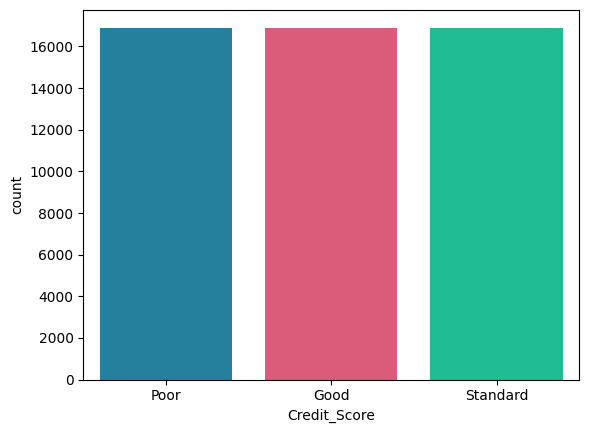

In [ ]:
custom_palette = ["#118AB2", "#EF476F", "#06D6A0"]

sns.countplot(data=undersampled_train_df, x="Credit_Score", palette=custom_palette)
plt.show()

### Encoding dan Scaling

**Note:**

Tahapan selanjutnya yaitu `encoding` dan `scaling`.
- `Encoding` : proses membuat sebuah indeks dalam bentuk bilangan bulat yang mewakiliki kategori tertentu dalam sebuah feature. Proses ini perlu dilakukan karena model ML hanya mampu memproses data dalam bentuk numerik.

- `Scaling` : proses pengubahan skala pada data numerik, yang dilakukan agar seluruh feature numerik memiliki skala yang ter`standarisasi`. Sehingga dapat meningkatkan efisiensi dalam proses pelatihan model

Sebelum melakukan `encoding` dan `scaling`, perlu dilakukan pemisahan antara feature training (X) dan target (Y) terlebih dahulu

In [ ]:
X_train = undersampled_train_df.drop(columns="Credit_Score", axis=1)
y_train = undersampled_train_df["Credit_Score"]

X_test = test_df.drop(columns="Credit_Score", axis=1)
y_test = test_df["Credit_Score"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import joblib

def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))

            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "/content/model/scaler_{}.joblib".format(feature))
        return df

def encoding(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "/content/model/encoder_{}.joblib".format(feature))

            df_test["{}".format(feature)] = encoder.transform(df_test[feature])
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "/content/model/encoder_{}.joblib".format(feature))
        return df


**Note:**

- Function `scaling()` di atas digunakan untuk melakukan proses `scaling` dengan menggunakan metode `MinMaxScaler` dari scikit-learn. Metode scaling tersebut menggunakan nilai minimum dan maksimum yang terdapat pada sebuah feature dan `mengubah data` tersebut ke dalam `skala 0-1`.
- Selain itu, function `scaling()` ini akan menyimpan object yang digubakan untuk melakukan proses scaling pada setiap feature yang akan disimpan dalam sebuah berkas dengan format `.joblib`. Berkas tersebut nantinya akan digunakan untuk menjalankan proses `data preprocessing` dalam lingkup `production` atau `deployment` dengan hasil yang konsisten.
- Function `encoding()` akan melakukan proses `encoding` pada seluruh feature categorical dengan bantuan `LabelEncoder()` dari scikit learn.
- Function `encoding()` juga akan menyimpan setiap object yang digunakan untuk melakukan proses encoding pada suatu feature categorical yang akan disimpan dalam sebuah berkas dengan format `.joblib.` Berkas tersebut nantinya akan digunakan untuk menjalankan proses `data preprocessing` dalam lingkup `production` atau `deployment` dengan hasil yang konsisten.

In [ ]:
numerical_columns = [
    'Age',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Total_EMI_per_month',
    'Amount_invested_monthly',
    'Monthly_Balance',
    'Credit_History_Age'
]

categorical_columns = [
    'Credit_Mix',
    'Payment_of_Min_Amount',
    'Payment_Behaviour'
]

new_train_df, new_test_df = scaling(numerical_columns, X_train, X_test)
new_train_df, new_test_df = encoding(categorical_columns, new_train_df, new_test_df)

**Note:**

Hingga tahapan ini data yang digunakan telah berhasil diubah dalam skala yang sama dan seluruh feature categorical telah diubah ke dalam bentuk integer. Tahapan berikutnya yaitu kita perlu melakukan `encoding` juga terhadap feature target pada `data train` dan `data test`

In [ ]:
encoder = LabelEncoder()
encoder.fit(y_train)

new_y_train = encoder.transform(y_train)
new_y_test = encoder.transform(y_test)

joblib.dump(encoder, "model/encoder_target.joblib")

['model/encoder_target.joblib']

In [ ]:
new_y_train

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
new_y_test

array([2, 0, 2, ..., 0, 2, 1])

### Principal Component Analysis (PCA)

**Note:**

- `Principal Component Analysis`(PCA) adalah salah satu teknik untuk mengurangi jumlah feature pada data dengan tetap mempertahankan informasi pada data. PCA mentransformasi data dari `n-dimensional space` ke dalam sistem berkoordinat baru dengan dimensi-m (m lebih kecil dari n).

- PCA umumnyaa digunakan untuk mereduksi feature asli menjadi sejumlah kecil feature yang tidak berkorelasi linear. Feature baru tersebut disebut dengan `principal component (PC)`. PC tersebut dapat menangkap sebagian besar varians (berkorelasi dengan informasi) dalam feature asli, sehingga ketika teknik PCA ini diterapkan pada suatu data, untuk mempresentasikan data asli ia hanya menggunakan PC.

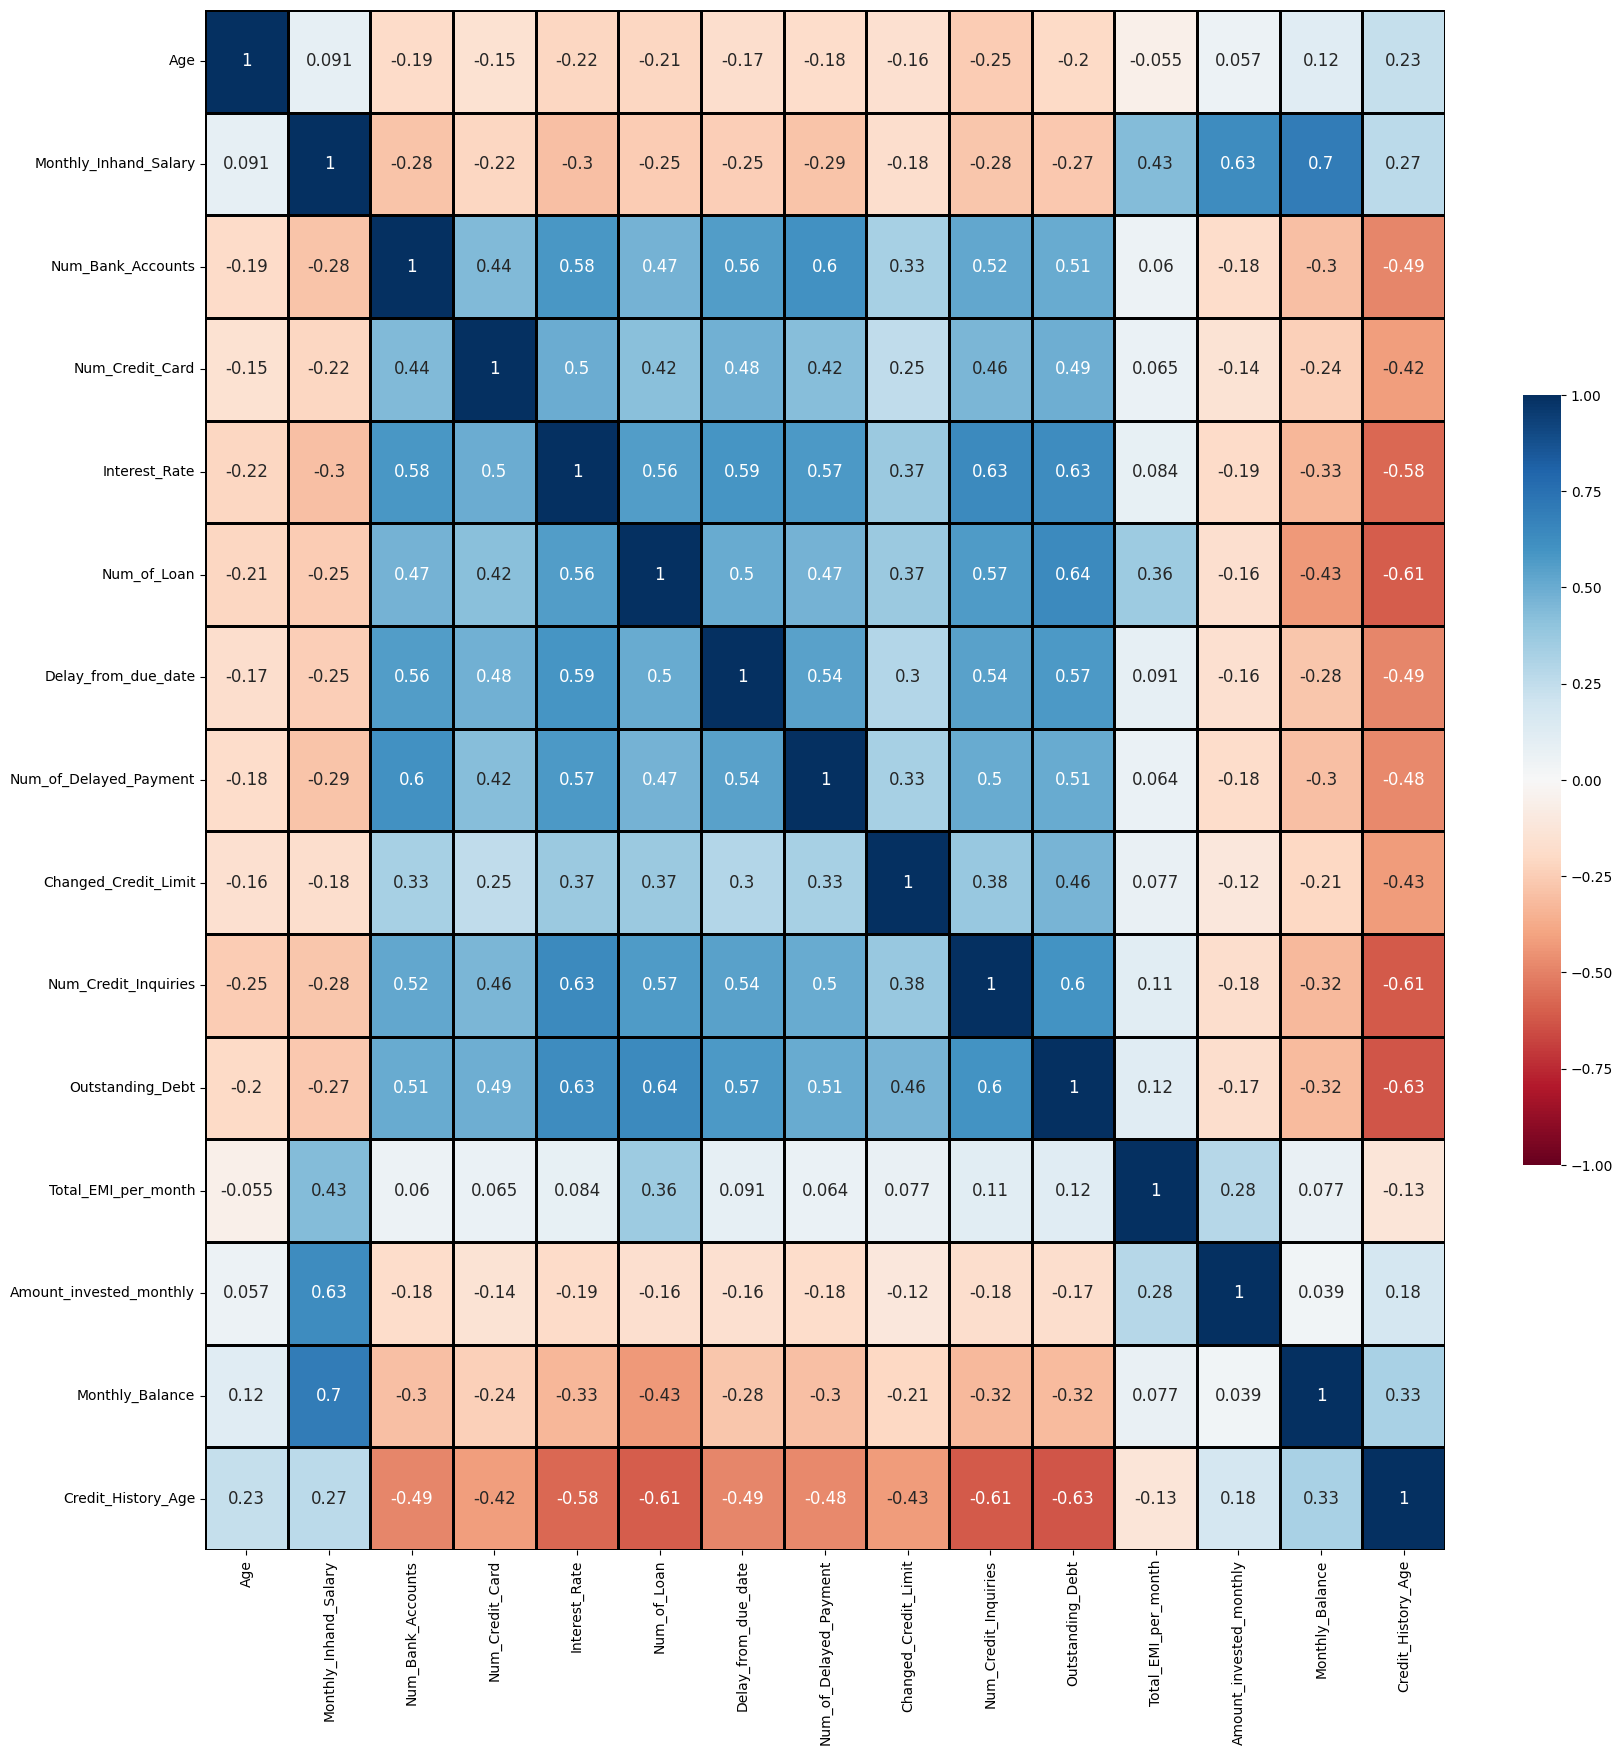

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df[numerical_columns].corr(), annot=True, cmap='RdBu', linecolor='black', linewidth=1, cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,\
             linewidths=0.01, annot_kws={"size":12})
plt.show()

**Note:**

Pada project ini penerapan PCA dilakukan untuk mengatasi  multikolinearitas yang terdapat pada feature numerik seperti yang ditunjukkan pada visualisasi di atas.

**Observation:**
- Pada visualisasi data di atas terlihat beberapa feature saling berkorelasi satu sama lain. Namun, pada seluruh feature tersebut tidak bisa langsung dilakukan PCA dalam satu proses karena terdapat beberapa feature yang hanya berkorelasi pada feature tertentu. Oleh karena itu, terlebih dahulu perlu dikelompokkan beberapa feature yang saling berkorelasi tersebut dan hanya melakukan PCA pada feature tersebut.

- Apabila dilihat terdapat 2 kelompok feature yang saling berkorelasi

In [ ]:
pca_numerical_columns_1 = [
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Credit_History_Age'
]

pca_numerical_columns_2 = [
    'Monthly_Inhand_Salary',
    'Monthly_Balance',
    'Amount_invested_monthly',
    'Total_EMI_per_month'
]

**Note:**

Setelah mengelompokkan feature yang saling berkorelasi, selanjutnya perlu menyiapkan sebuah `dataframe` baru yang akan digunakan untuk menampung hasil dari proses PCA.

In [ ]:
train_pca_df = new_train_df.copy().reset_index(drop=True)
test_pca_df = new_test_df.copy().reset_index(drop=True)

**Note:**

Hingga tahapan ini proses PCA terhadap kelompok feature pertama telah siap dilakukan. Untuk proses selanjutnya, terlebih dahulu perlu dicari jumlah `principal component` yang paling optimal dengan cara sebagai berikut

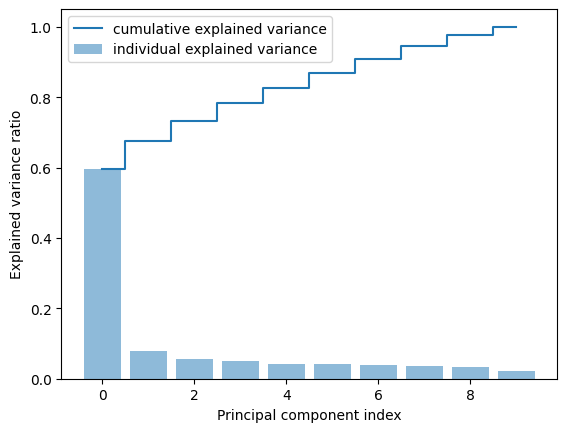

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(pca_numerical_columns_1), random_state=123)
pca.fit(train_pca_df[pca_numerical_columns_1])
princ_comp = pca.transform(train_pca_df[pca_numerical_columns_1])

var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(pca_numerical_columns_1)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns_1)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()


**Observation:**

Pada visualisasi di atas menunjukkan visualisasi jumlah varians untuk setiap jumlah `principal component`. Terlihat bahwa hanya dengan mengambil 5 `principal component` (PC), kita telah memperoleh lebih dari `80% varians`. Ini artinya kita bisa menggunakan 5 PC tersebut untuk mewakili seluruh kelompok feature tersebut yang aslinya berjumlah 9 feature.

Berikutnya mari kita coba melakukan proses PCA kembali dengan jumlah `principal component` sebanyak 5. Lalu kelompok feature asli nya akan diganti dengan 5 `principal component` dari proses PCA.

In [ ]:
pca_1 = PCA(n_components=5, random_state=123)
pca_1.fit(train_pca_df[pca_numerical_columns_1])
joblib.dump(pca_1, "model/pca_{}.joblib".format(1))
princ_comp_1 = pca_1.transform(train_pca_df[pca_numerical_columns_1])
train_pca_df[["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"]] = pd.DataFrame(princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"])
train_pca_df.drop(columns=pca_numerical_columns_1, axis=1, inplace=True)
train_pca_df.head()

,Age,Monthly_Inhand_Salary,Credit_Mix,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5
0,0.142857,0.317509,3,2,0.144668,0.079791,3,0.118677,0.359035,0.050510,-0.087199,0.160941,-0.265085
1,0.809524,0.033696,3,1,0.005249,0.007408,0,0.186383,-0.300934,0.170941,0.131651,0.063709,0.060881
2,0.238095,0.892247,1,1,0.382209,0.115708,0,0.522796,-0.549508,-0.350739,-0.122712,0.052090,-0.023753
3,0.619048,0.325166,3,1,0.024706,0.111087,0,0.427219,-0.444935,0.222051,-0.082392,-0.063816,0.015739
4,0.404762,0.278385,2,2,0.044188,0.028061,0,0.354554,0.102981,0.073444,0.282772,-0.010061,-0.174278


**Note:**

Tahapan berikutnya yaitu melakukan proses PCA untuk kelompok data berikutnya

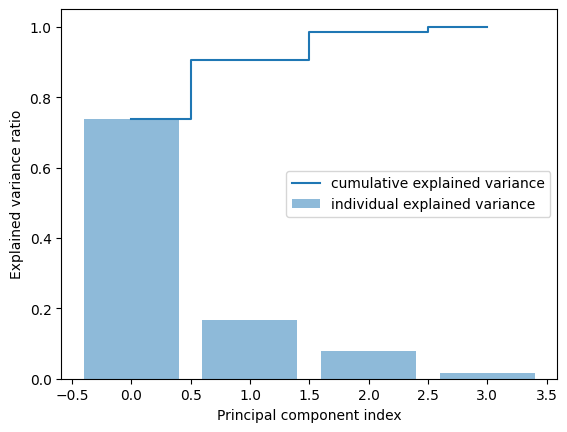

In [ ]:
pca = PCA(n_components=len(pca_numerical_columns_2), random_state=123)
pca.fit(train_pca_df[pca_numerical_columns_2])
princ_comp = pca.transform(train_pca_df[pca_numerical_columns_2])

var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(pca_numerical_columns_2)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns_2)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

**Observation:**

Berdasarkan visualisasi data di atas, dapat diketahui bahwa hanya dengan menggunakan 2 `principal component` (PC), kita telah memperoleh `90% varians`. Ini artinya kita bisa menggunakan 2 PC ini untuk mewakili sebagian besar informasi dari seluruh feature pada kelompok ini yang berjumlah `4 feature`.

Berikutnya mari kita coba melakukan proses PCA kembali dengan jumlah `principal component` sebanyak 2. Lalu kelompok feature asli nya akan diganti dengan 2 `principal component` dari proses PCA.

In [ ]:
pca_2 = PCA(n_components=2, random_state=123)
pca_2.fit(train_pca_df[pca_numerical_columns_2])
joblib.dump(pca_2, "model/pca_{}.joblib".format(2))
princ_comp_2 = pca_2.transform(train_pca_df[pca_numerical_columns_2])
train_pca_df[["pc2_1", "pc2_2"]] = pd.DataFrame(princ_comp_2, columns=["pc2_1", "pc2_2"])
train_pca_df.drop(columns=pca_numerical_columns_2, axis=1, inplace=True)
train_pca_df.head()

,Age,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5,pc2_1,pc2_2
0,0.142857,3,2,3,0.359035,0.050510,-0.087199,0.160941,-0.265085,-0.012252,0.114444
1,0.809524,3,1,0,-0.300934,0.170941,0.131651,0.063709,0.060881,-0.268681,-0.056987
2,0.238095,1,1,0,-0.549508,-0.350739,-0.122712,0.052090,-0.023753,0.696409,-0.012599
3,0.619048,3,1,0,-0.444935,0.222051,-0.082392,-0.063816,0.015739,0.110863,-0.129188
4,0.404762,2,2,0,0.102981,0.073444,0.282772,-0.010061,-0.174278,0.023066,-0.124987


**Note:**

Perlu dilakukan PCA juga untuk data uji

In [ ]:
test_princ_comp_1 = pca_1.transform(test_pca_df[pca_numerical_columns_1])
test_pca_df[["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"]] = pd.DataFrame(test_princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"])
test_pca_df.drop(columns=pca_numerical_columns_1, axis=1, inplace=True)

test_princ_comp_1 = pca_2.transform(test_pca_df[pca_numerical_columns_2])
test_pca_df[["pc2_1", "pc2_2"]] = pd.DataFrame(test_princ_comp_1, columns=["pc2_1", "pc2_2"])
test_pca_df.drop(columns=pca_numerical_columns_2, axis=1, inplace=True)
test_pca_df.head()

,Age,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5,pc2_1,pc2_2
0,0.214286,1,1,6,-0.376910,-0.054250,0.160442,-0.075147,-0.222785,0.177893,0.196907
1,0.690476,1,0,5,-0.878475,-0.256461,0.258294,-0.086387,-0.059837,0.230646,-0.056205
2,0.738095,3,2,5,0.726495,0.181030,-0.208147,-0.077032,0.194106,-0.266708,-0.030792
3,0.428571,0,2,5,0.810262,0.087717,-0.008744,0.046554,-0.195614,-0.236827,-0.014080
4,0.476190,2,2,0,0.482297,-0.147736,0.057799,0.047993,0.195740,-0.016392,-0.013604


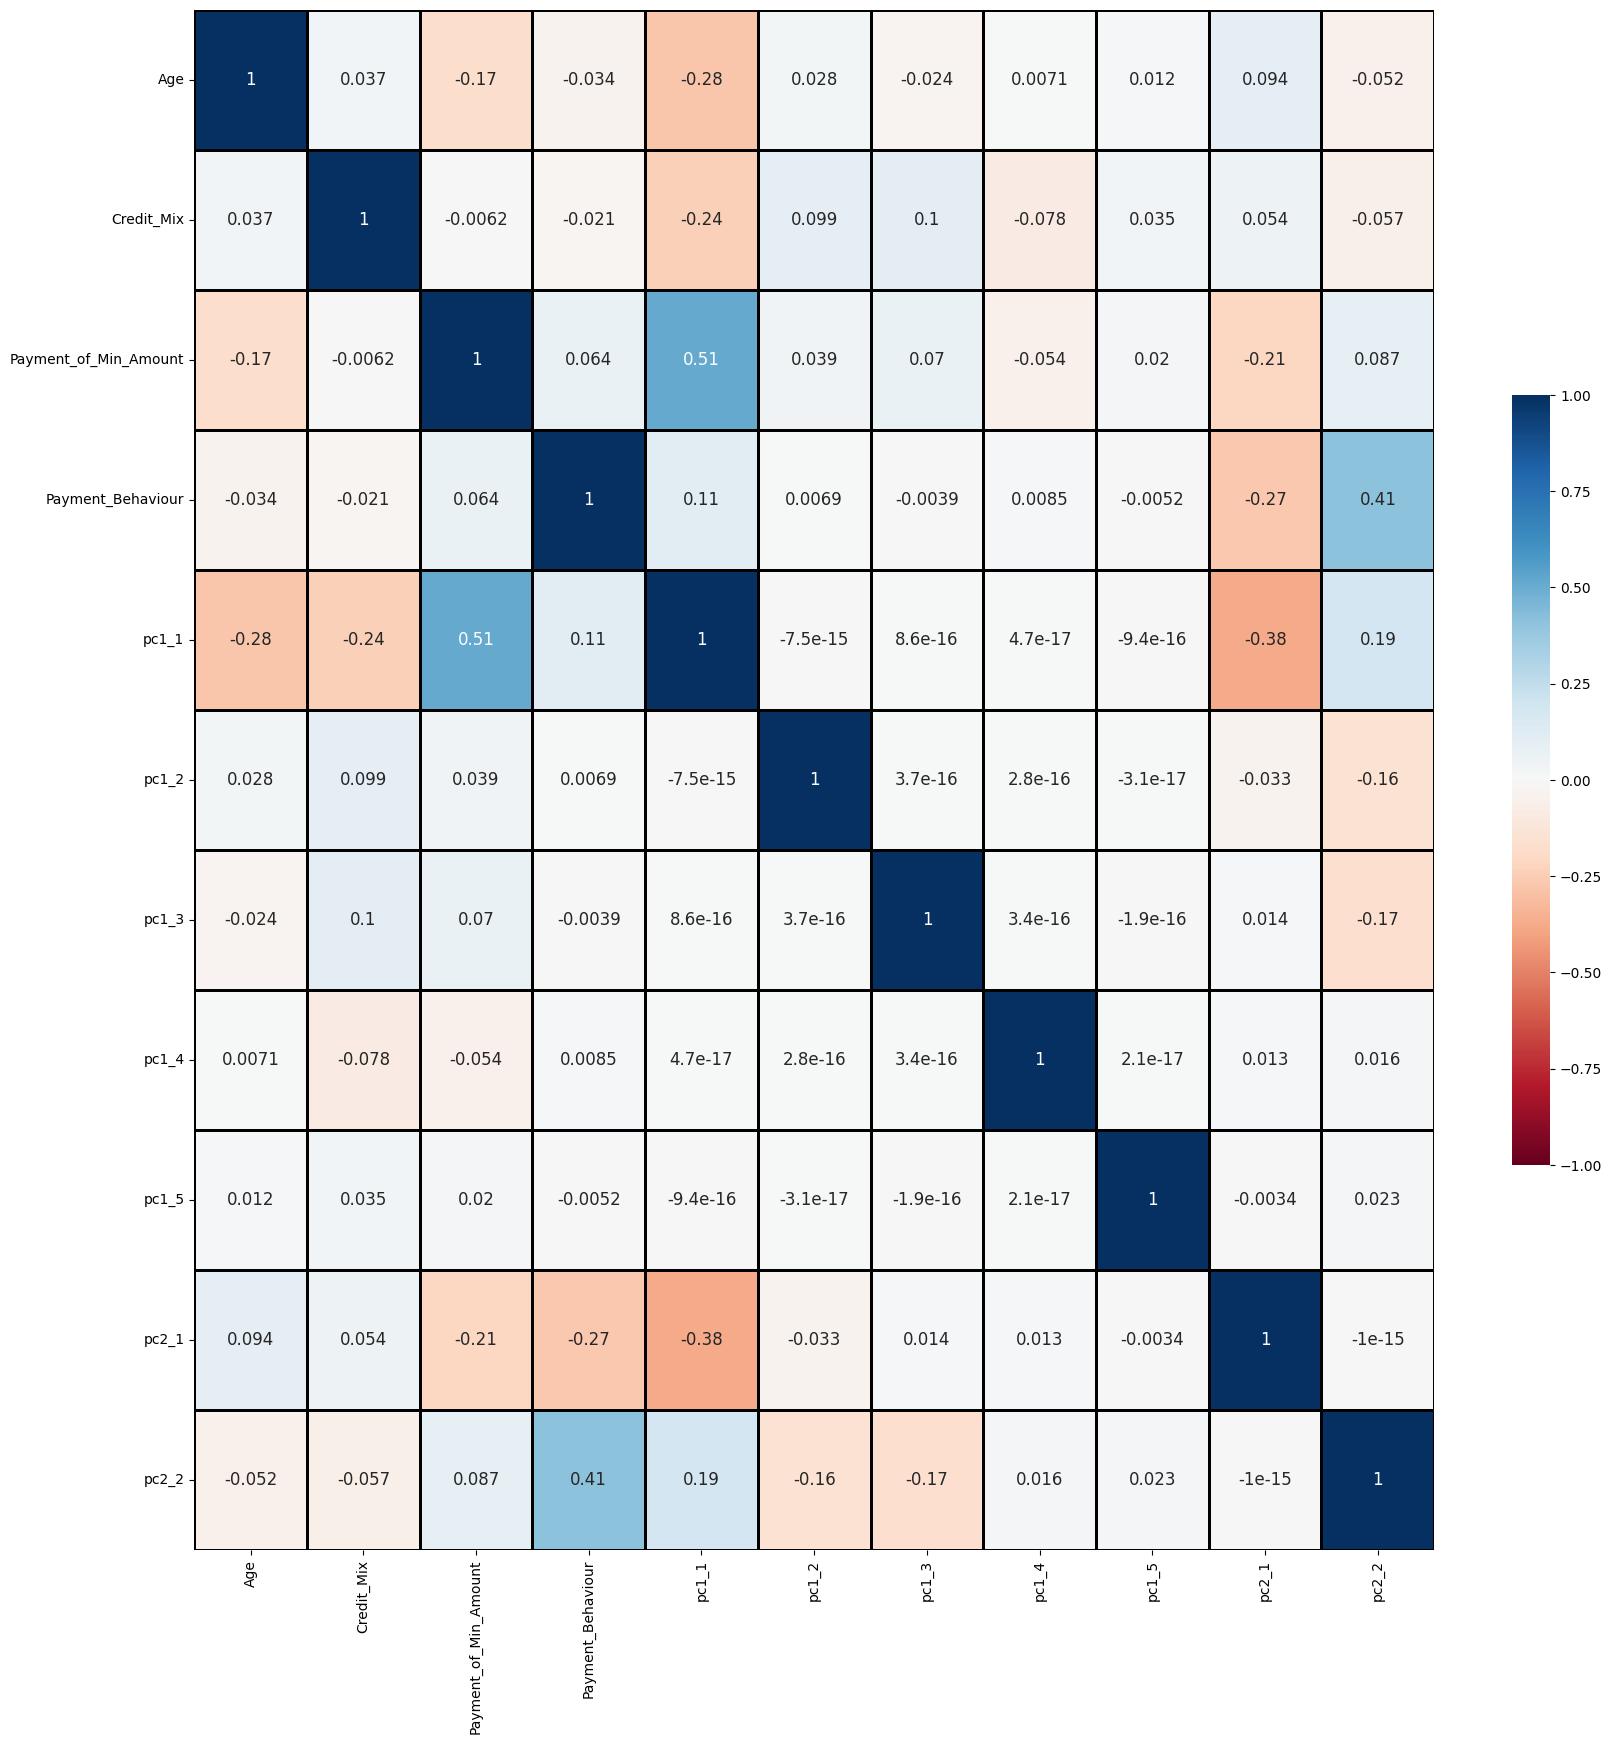

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(train_pca_df.corr(), annot=True, cmap='RdBu', linecolor='black', linewidth=1, cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,\
             linewidths=0.01, annot_kws={"size":12})
plt.show()

**Observation:**

- Hingga tahapan ini kita hanya memiliki `11 feature` yang akan digunakan dari `19 feature` awal. 11 feature tersebut akan digunakan dalam proses pelatihan model machine learning.

- PCA Components (PC1, PC2, etc.) sudah tidak menunjukkan `multikolinearitas` satu dengan yang lain. Sehingga data sudah siap untuk digunakan untuk tahapan pengembangan model machine learnin.

***
## Modelling
***

Seperti yang telah dijelaskan pada bagian **Business Understanding** bahwa pada project ini akan menggunakan beberapa model machine learning, di antaranya yaitu `decision tree` dan `random forest`. Berdasarkan dua model machine learning yang dibangun tersebut, akan dipilih model dengan performa dan akurasi terbaik.

### Decision Tree

In [ ]:
tree_model = DecisionTreeClassifier(random_state=123)

param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5, 6, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_tree.fit(train_pca_df, new_y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [ ]:
print("best parameters: ", CV_tree.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto'}


In [ ]:
tree_model = DecisionTreeClassifier(
    random_state=123,
    criterion='gini',
    max_depth=5,
    max_features='auto'
)

tree_model.fit(train_pca_df, new_y_train)
joblib.dump(tree_model, "model/tree_model.joblib")

['model/tree_model.joblib']

### Random Forest


In [ ]:
rdf_model = RandomForestClassifier(random_state=123)

param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_rdf = GridSearchCV(estimator=rdf_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_rdf.fit(train_pca_df, new_y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [ ]:
print("best parameters: ", CV_rdf.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}


In [ ]:
rdf_model = RandomForestClassifier(
    random_state=123,
    max_depth=8,
    n_estimators=100,
    max_features='auto',
    criterion='gini',
    n_jobs=-1
)
rdf_model.fit(train_pca_df, new_y_train)
joblib.dump(rdf_model, "model/rdf_model.joblib")

['model/rdf_model.joblib']

## Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluating(y_pred, y_true):
    '''Evaluasi model'''
    labels=['Good', 'Poor', 'Standard']

    print(classification_report(y_pred=y_pred, y_true=y_true))

    cnf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_true, labels=labels)
    confusion_matrix_df = pd.DataFrame(cnf_matrix, labels, labels)
    sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()

    return confusion_matrix_df

              precision    recall  f1-score   support

        Good       0.48      0.83      0.61       921
        Poor       0.62      0.69      0.66      1452
    Standard       0.81      0.55      0.66      2627

    accuracy                           0.64      5000
   macro avg       0.64      0.69      0.64      5000
weighted avg       0.70      0.64      0.65      5000



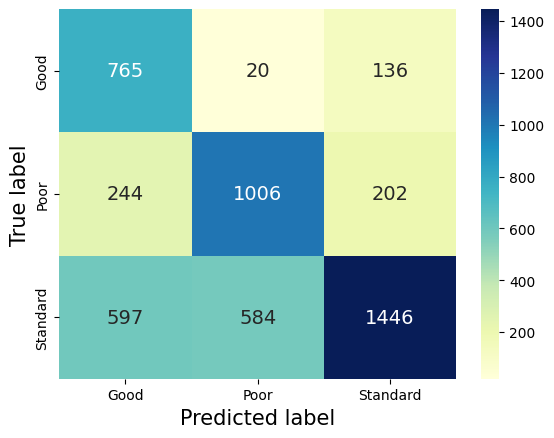

,Good,Poor,Standard
Good,765,20,136
Poor,244,1006,202
Standard,597,584,1446


In [ ]:
# Decision tree
y_pred_test = tree_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)
evaluating(y_pred=y_pred_test, y_true=y_test)

              precision    recall  f1-score   support

        Good       0.48      0.81      0.61       921
        Poor       0.63      0.73      0.67      1452
    Standard       0.83      0.56      0.66      2627

    accuracy                           0.65      5000
   macro avg       0.65      0.70      0.65      5000
weighted avg       0.71      0.65      0.66      5000



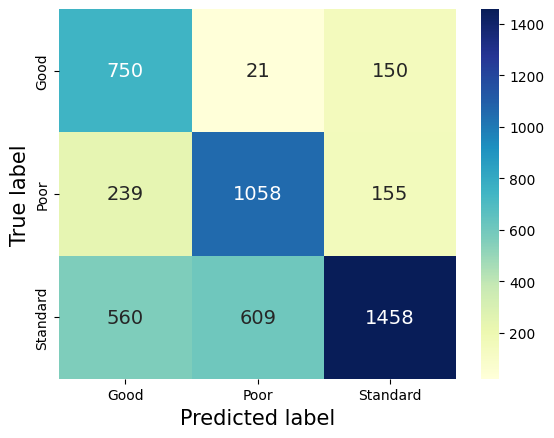

,Good,Poor,Standard
Good,750,21,150
Poor,239,1058,155
Standard,560,609,1458


In [ ]:
# Random Forest
y_pred_test = rdf_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

evaluating(y_pred=y_pred_test, y_true=y_test)

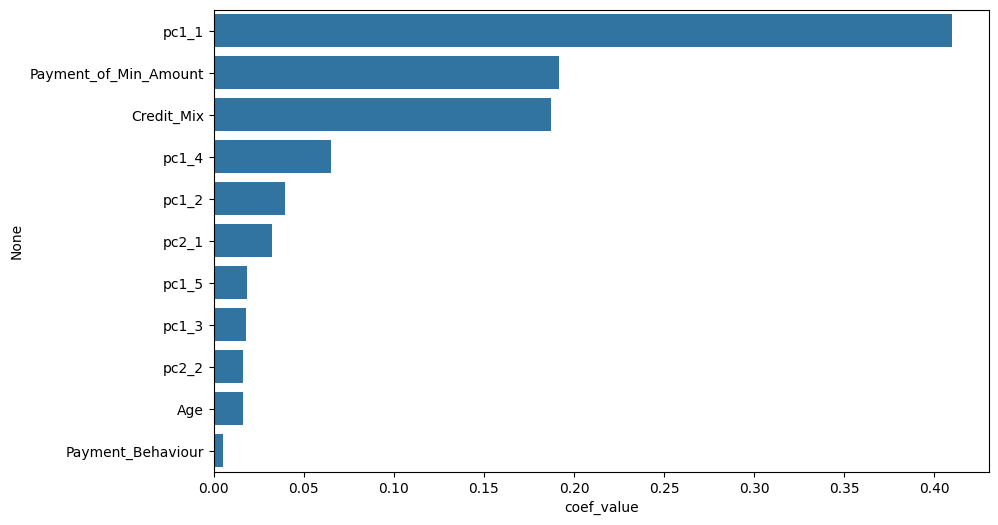

,coef_value
pc1_1,0.409727
Payment_of_Min_Amount,0.191847
Credit_Mix,0.187341
pc1_4,0.065172
pc1_2,0.039791
pc2_1,0.032332
pc1_5,0.018428
pc1_3,0.018123
pc2_2,0.016324
Age,0.015992


In [ ]:
def plot_feature_importances(feature_importances, cols):
    features = pd.DataFrame(feature_importances, columns=['coef_value']).set_index(cols)
    features = features.sort_values(by='coef_value', ascending=False)
    top_features = features

    plt.figure(figsize=(10, 6))
    sns.barplot(x='coef_value', y=features.index, data=features)
    plt.show()
    return top_features

plot_feature_importances(rdf_model.feature_importances_, train_pca_df.columns)

In [ ]:
joblib.dump(rdf_model, "model/rdf_model.joblib")

['model/rdf_model.joblib']

***
End of code
***